# Implied Volatility Dynamics

[robotwealth.com](https://robotwealth.com)


# Install Dependencies


In [1]:
install.packages('tidyverse')
install.packages('lubridate')
install.packages('slider')
install.packages('tibbletime')
library(tidyverse)
library(lubridate)
library(slider)
library(tibbletime)


# Set chart options
options(repr.plot.width = 14, repr.plot.height=7)
theme_set(theme_bw())
theme_update(text = element_text(size = 20))

Installing package into ‘/home/marco/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

Installing package into ‘/home/marco/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

also installing the dependency ‘warp’


Installing package into ‘/home/marco/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ 

# Get Data

Our dataset contains daily observations for:
 - SPVIXSTR
 - VIX     - 30 day implied volatility index
 - VIX3M   - 3m implied volatility index
 - VVIX    - Volatility of Volatility index

In [6]:
raw <- read_csv("https://storage.googleapis.com/tlaq_public/vol.csv")

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 8177 Columns: 10
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (9): SPVIXSTR, SPY, VIX, VIX3M, ATM_1M, ATM_2M, ATM_3M, ATM_6M, ATM_1Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date,SPVIXSTR,SPY,VIX,VIX3M,ATM_1M,ATM_2M,ATM_3M,ATM_6M,ATM_1Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2/01/1990,NA,NA,17.24,NA,NA,NA,NA,NA,NA
3/01/1990,NA,NA,18.19,NA,NA,NA,NA,NA,NA
4/01/1990,NA,NA,19.22,NA,NA,NA,NA,NA,NA
5/01/1990,NA,NA,20.11,NA,NA,NA,NA,NA,NA
8/01/1990,NA,NA,20.26,NA,NA,NA,NA,NA,NA
9/01/1990,NA,NA,22.20,NA,NA,NA,NA,NA,NA
10/01/1990,NA,NA,22.44,NA,NA,NA,NA,NA,NA
11/01/1990,NA,NA,20.05,NA,NA,NA,NA,NA,NA
12/01/1990,NA,NA,24.64,NA,NA,NA,NA,NA,NA


In [3]:
raw <- raw %>%
  mutate(date = lubridate::dmy(Date))

VVIX <- read_csv("https://storage.googleapis.com/tlaq_public/VVIX_History.csv")
VVIX <- VVIX %>%
  mutate(date = lubridate::mdy(DATE))

features <- raw %>%
  left_join(VVIX, by = 'date') %>%
  mutate(
    basis_ratio = VIX3M / VIX,
    basis_ratio_bucket = ntile(basis_ratio, 10),
    VIX_bucket = ntile(VIX, 10),
    VVIX_bucket = ntile(VVIX, 10),
    SPVIXSTR_1df = log(lead(SPVIXSTR, 1) / SPVIXSTR),
    SPVIXSTR_2df = log(lead(SPVIXSTR,2) / lead(SPVIXSTR,1))
)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 8177 Columns: 10
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (9): SPVIXSTR, SPY, VIX, VIX3M, ATM_1M, ATM_2M, ATM_3M, ATM_6M, ATM_1Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4044 Columns: 2
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): DATE
dbl (1): VVIX

ℹ Use `spec()` to retrieve the full

In [ ]:
features %>% tail()

Date,SPVIXSTR,SPY,VIX,VIX3M,ATM_1M,ATM_2M,ATM_3M,ATM_6M,ATM_1Y,date,DATE,VVIX,basis_ratio,basis_ratio_bucket,VIX_bucket,VVIX_bucket,SPVIXSTR_1df,SPVIXSTR_2df
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
7/06/2022,8.87,413.9518,24.02,26.52,NA,NA,NA,NA,NA,2022-06-07,06/07/2022,87.82,1.104080,5,8,5,-0.001128032,0.05061586
8/06/2022,8.86,409.4513,23.96,26.54,NA,NA,NA,NA,NA,2022-06-08,06/08/2022,92.68,1.107679,5,8,6,0.050615864,0.05733722
9/06/2022,9.32,399.7133,26.09,28.01,NA,NA,NA,NA,NA,2022-06-09,06/09/2022,98.82,1.073591,4,9,7,0.057337225,0.12819805
10/06/2022,9.87,388.1234,27.75,29.72,NA,NA,NA,NA,NA,2022-06-10,06/10/2022,99.75,1.070991,4,9,8,0.128198047,-0.03353282
13/06/2022,11.22,373.3871,34.02,34.24,NA,NA,NA,NA,NA,2022-06-13,06/13/2022,113.72,1.006467,2,10,9,-0.033532820,NA
14/06/2022,10.85,372.2619,32.69,33.28,NA,NA,NA,NA,NA,2022-06-14,06/14/2022,111.01,1.018048,2,10,9,NA,NA


# Plot distribution of basis, sorted into deciles

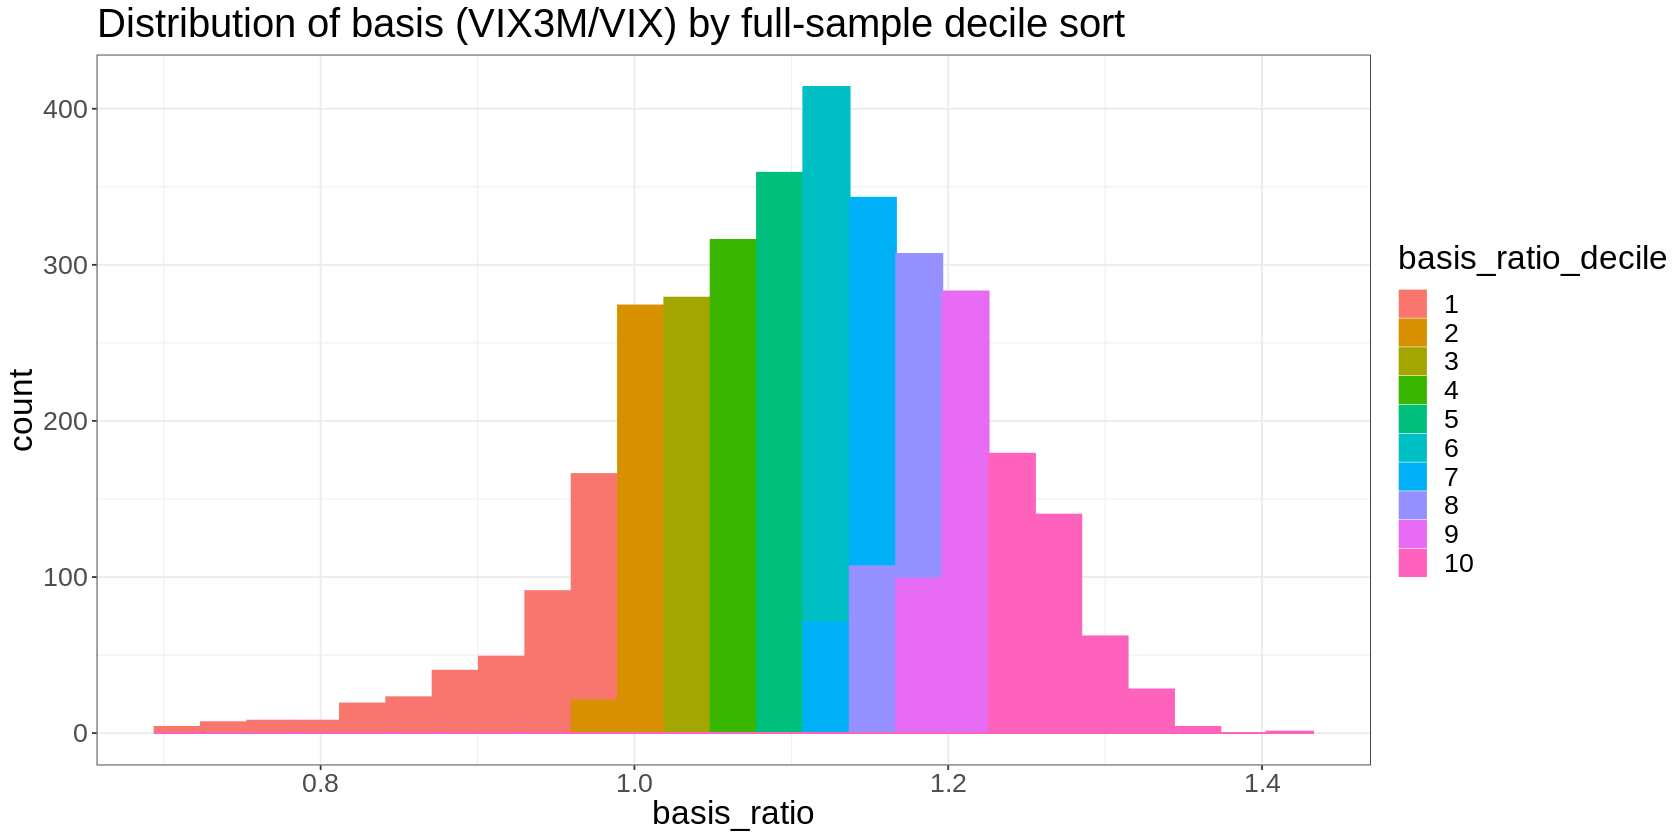

In [ ]:
features %>%
  select(date, basis_ratio, basis_ratio_bucket) %>%
  na.omit() %>%
  mutate(basis_ratio_decile = factor(basis_ratio_bucket)) %>%
  ggplot(aes(x=basis_ratio, color = basis_ratio_decile, fill = basis_ratio_decile)) +
    geom_histogram(position='identity', bins = 25) +
    ggtitle('Distribution of basis (VIX3M/VIX) by full-sample decile sort')

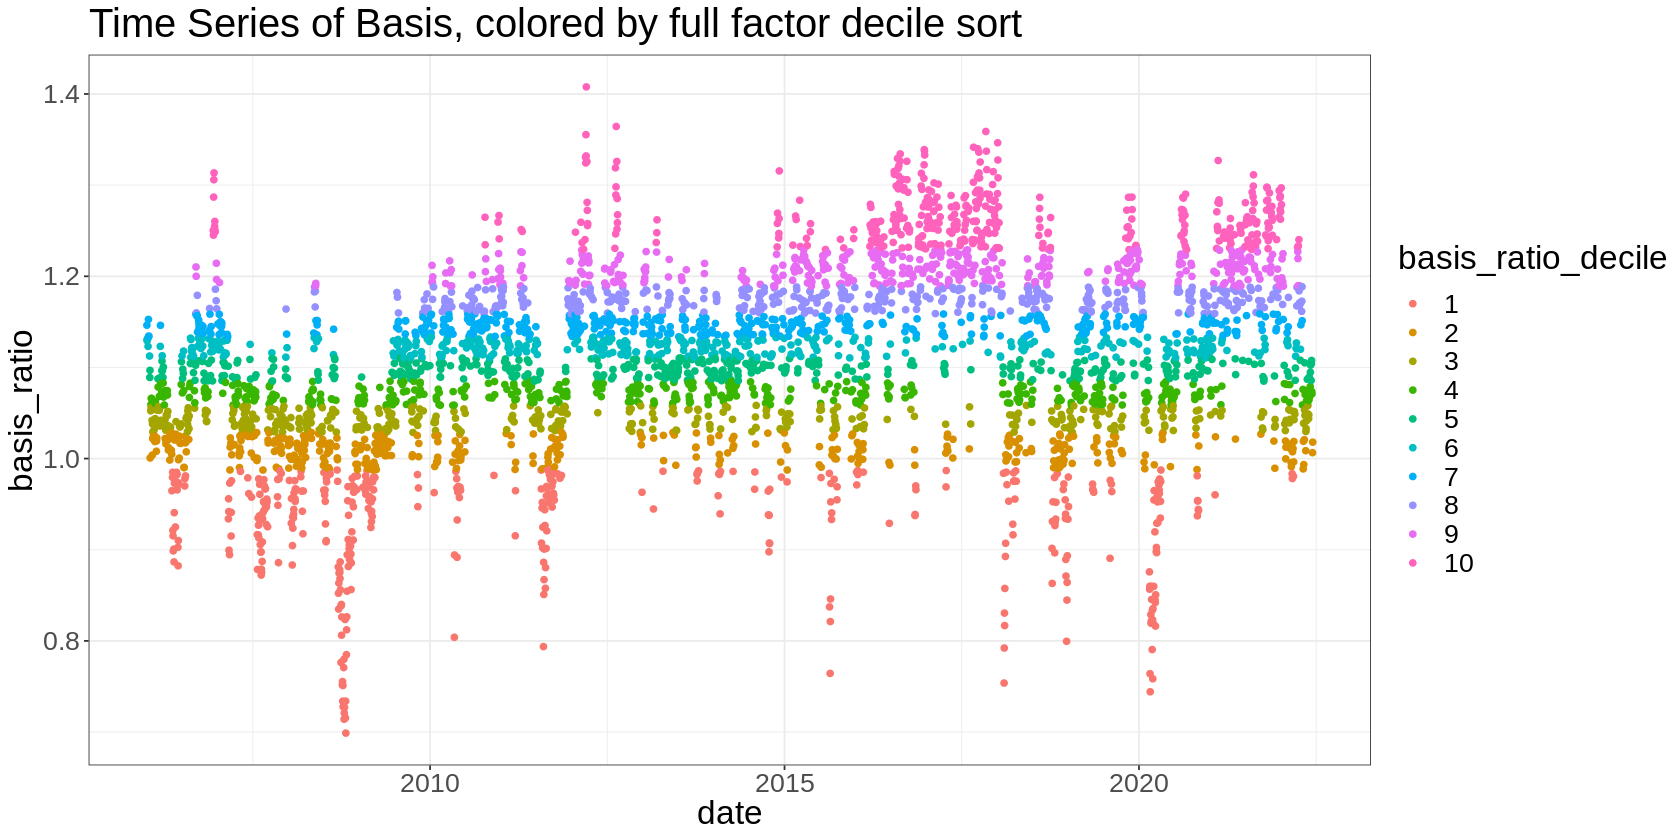

In [ ]:
features %>%
  select(date, basis_ratio, basis_ratio_bucket) %>%
  na.omit() %>%
  mutate(basis_ratio_decile = factor(basis_ratio_bucket)) %>%
  ggplot(aes(x=date, y=basis_ratio, color=basis_ratio_decile)) +
    geom_point() +
    ggtitle('Time Series of Basis, colored by full factor decile sort')

In [ ]:
features %>%
  select(date, basis_ratio, basis_ratio_bucket) %>%
  na.omit() %>%
  group_by(basis_ratio_bucket) %>%
  summarise(
    min = min(basis_ratio),
    max = max(basis_ratio),
    range = max-min
  )

basis_ratio_bucket,min,max,range
<int>,<dbl>,<dbl>,<dbl>
1,0.6988500,0.9874362,0.28858621
2,0.9874517,1.0286561,0.04120439
3,1.0286885,1.0583468,0.02965831
4,1.0583491,1.0849213,0.02657215
5,1.0849765,1.1103395,0.02536298
6,1.1103559,1.1336129,0.02325708
7,1.1336467,1.1588858,0.02523909
8,1.1589404,1.1885657,0.02962530
9,1.1888545,1.2292596,0.04040510


Let's look at how effective the basis ratio decile is by itself at sorting SPVIXSTR returns

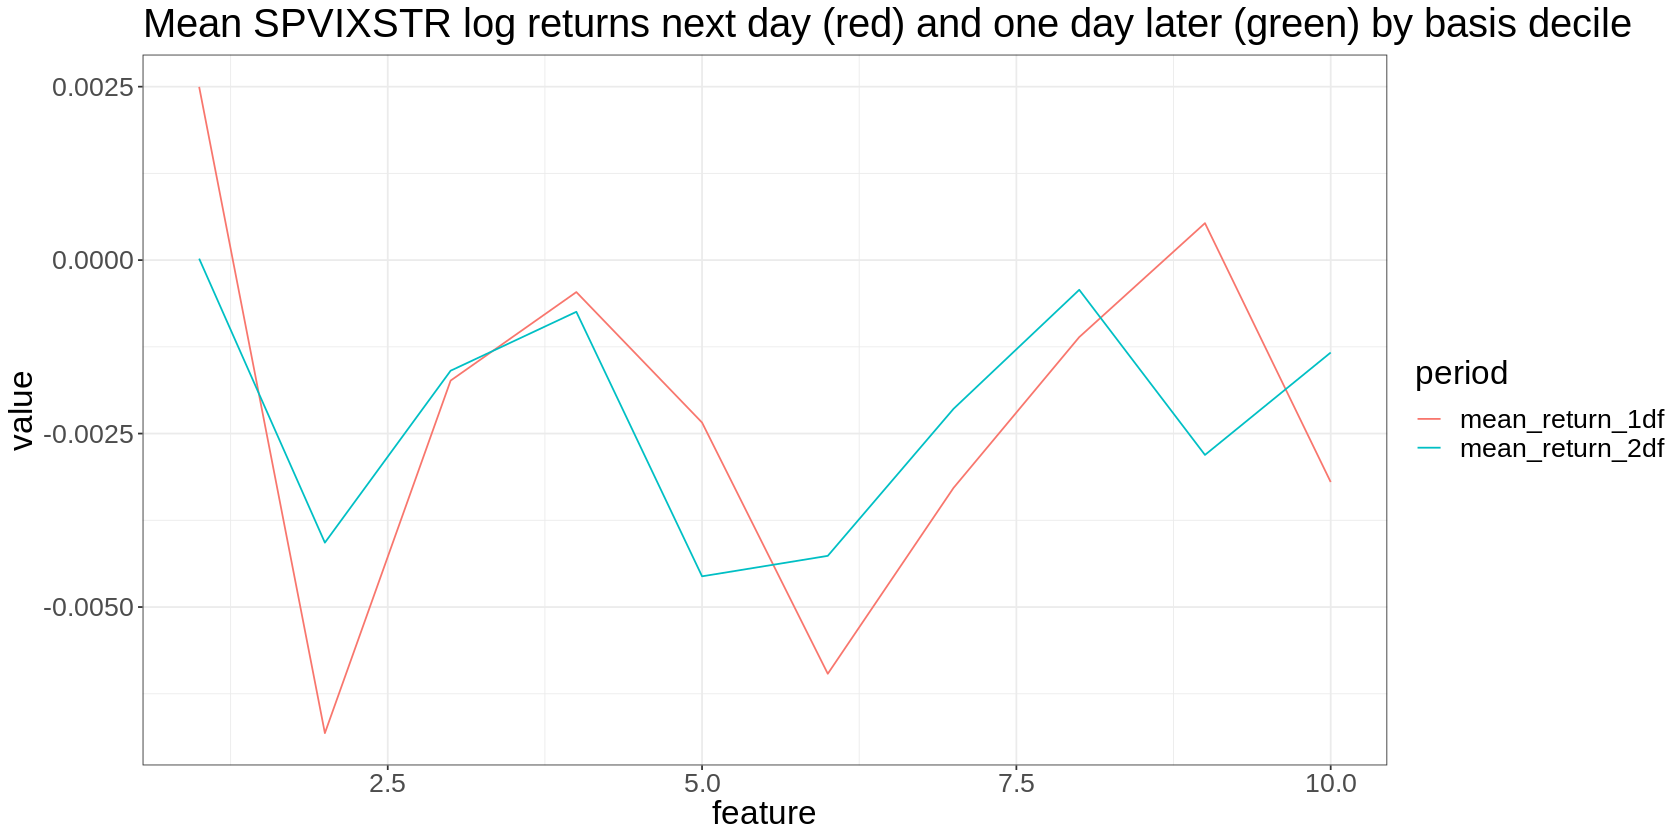

In [ ]:
features %>%
  mutate(feature = basis_ratio_bucket) %>%
  select(
    date,
    feature,
    SPVIXSTR_1df,
    SPVIXSTR_2df
  ) %>%
  na.omit() %>%
  group_by(feature) %>%
  summarise(
    mean_return_1df = mean(SPVIXSTR_1df),
    mean_return_2df = mean(SPVIXSTR_2df)
  )  %>%
  pivot_longer(-feature, names_to = 'period') %>%
  ggplot(aes(x=feature, y=value, color = period)) +
    geom_line() +
    ggtitle('Mean SPVIXSTR log returns next day (red) and one day later (green) by basis decile')

`summarise()` has grouped output by 'feature'. You can override using the
`.groups` argument.


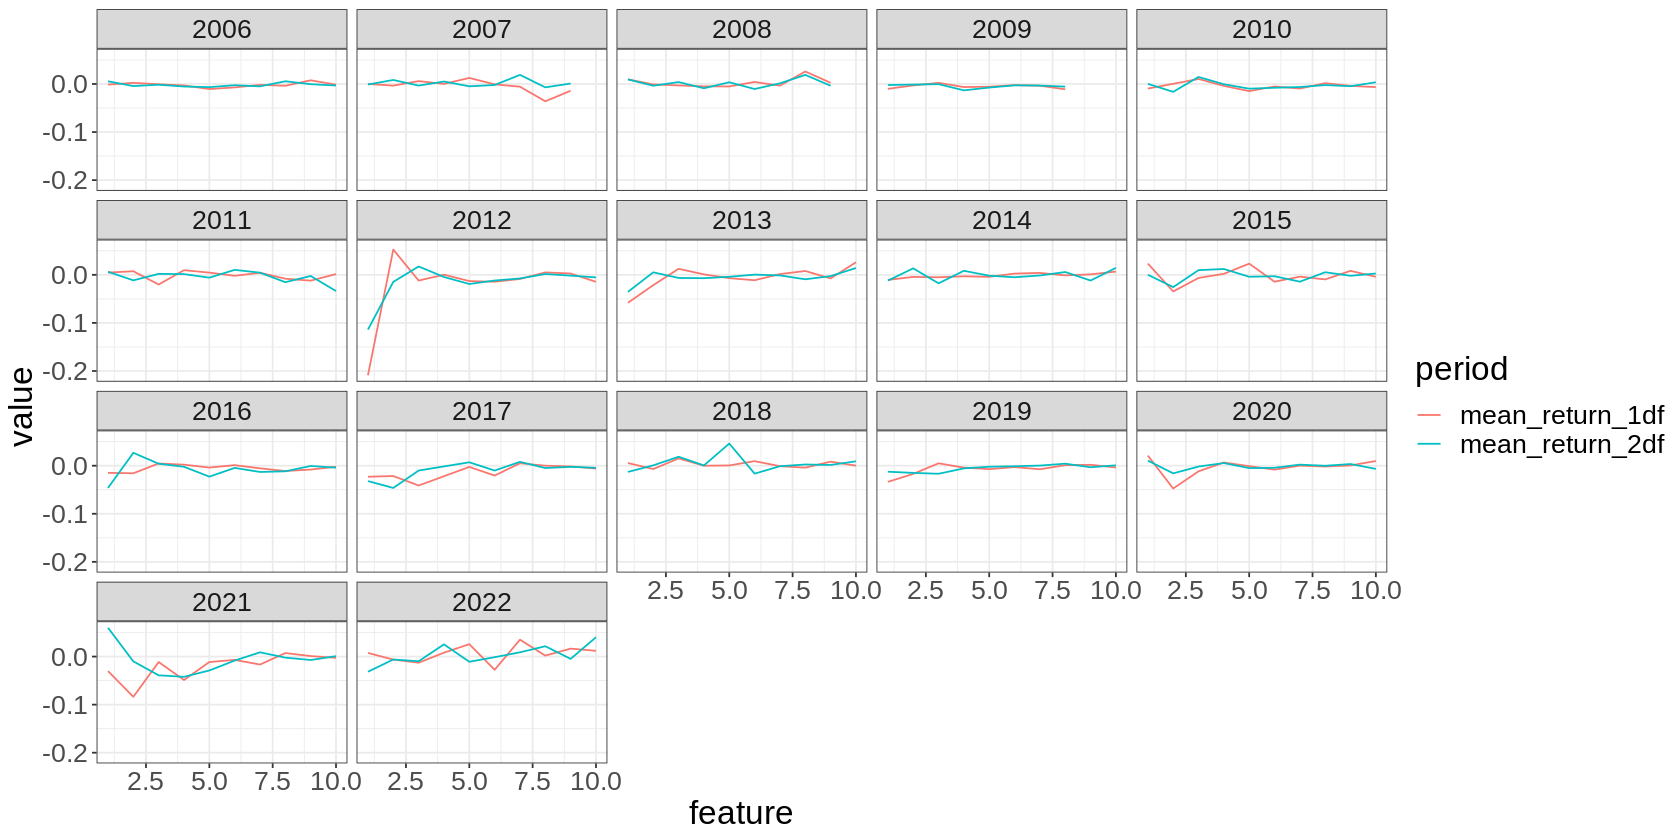

In [ ]:
features %>%
  mutate(
    feature = basis_ratio_bucket,
    year = lubridate::year(date)) %>%
  select(
    year,
    feature,
    SPVIXSTR_1df,
    SPVIXSTR_2df
  ) %>%
  na.omit() %>%
  group_by(feature, year) %>%
  summarise(
    mean_return_1df = mean(SPVIXSTR_1df),
    mean_return_2df = mean(SPVIXSTR_2df)
  ) %>%
  pivot_longer(-c(feature, year), names_to = 'period') %>%
  ggplot(aes(x=feature, y=value, color = period)) + geom_line() + facet_wrap(~year)

It seems to be mostly only effective by itself in the extremes of "don't sell vol" if it's negative.

Let's see if incorporating VIX mean reversion can help.

# Plot Distribution of VIX, sorted into deciles

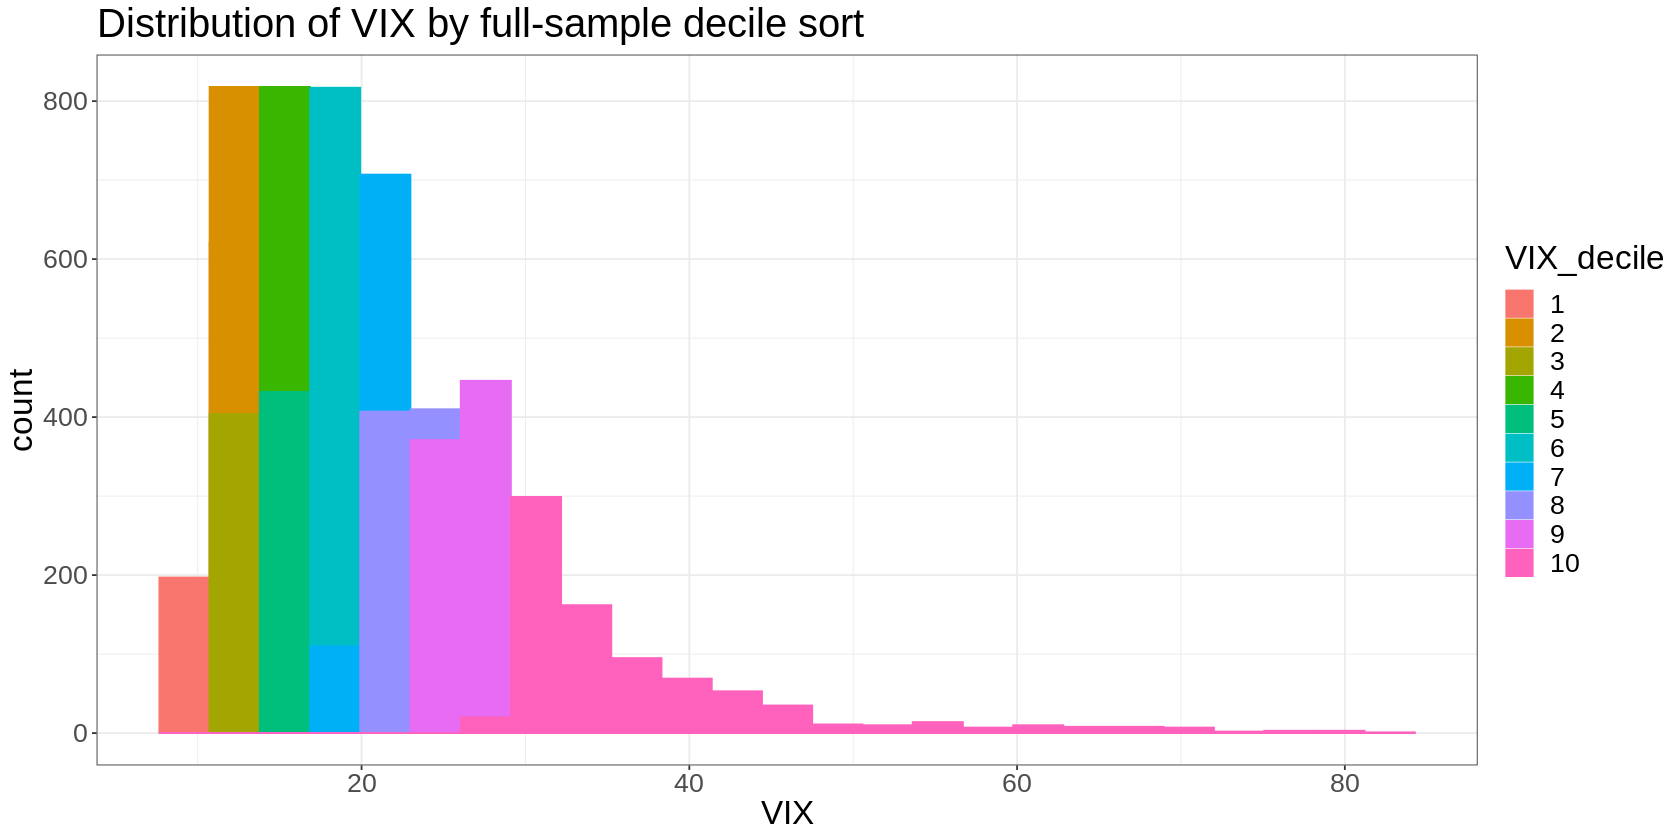

In [ ]:
features %>%
  select(date, VIX, VIX_bucket) %>%
  na.omit() %>%
  mutate(VIX_decile = factor(VIX_bucket)) %>%
  ggplot(aes(x=VIX, color = VIX_decile, fill = VIX_decile)) +
    geom_histogram(position='identity', bins = 25) +
    ggtitle('Distribution of VIX by full-sample decile sort')

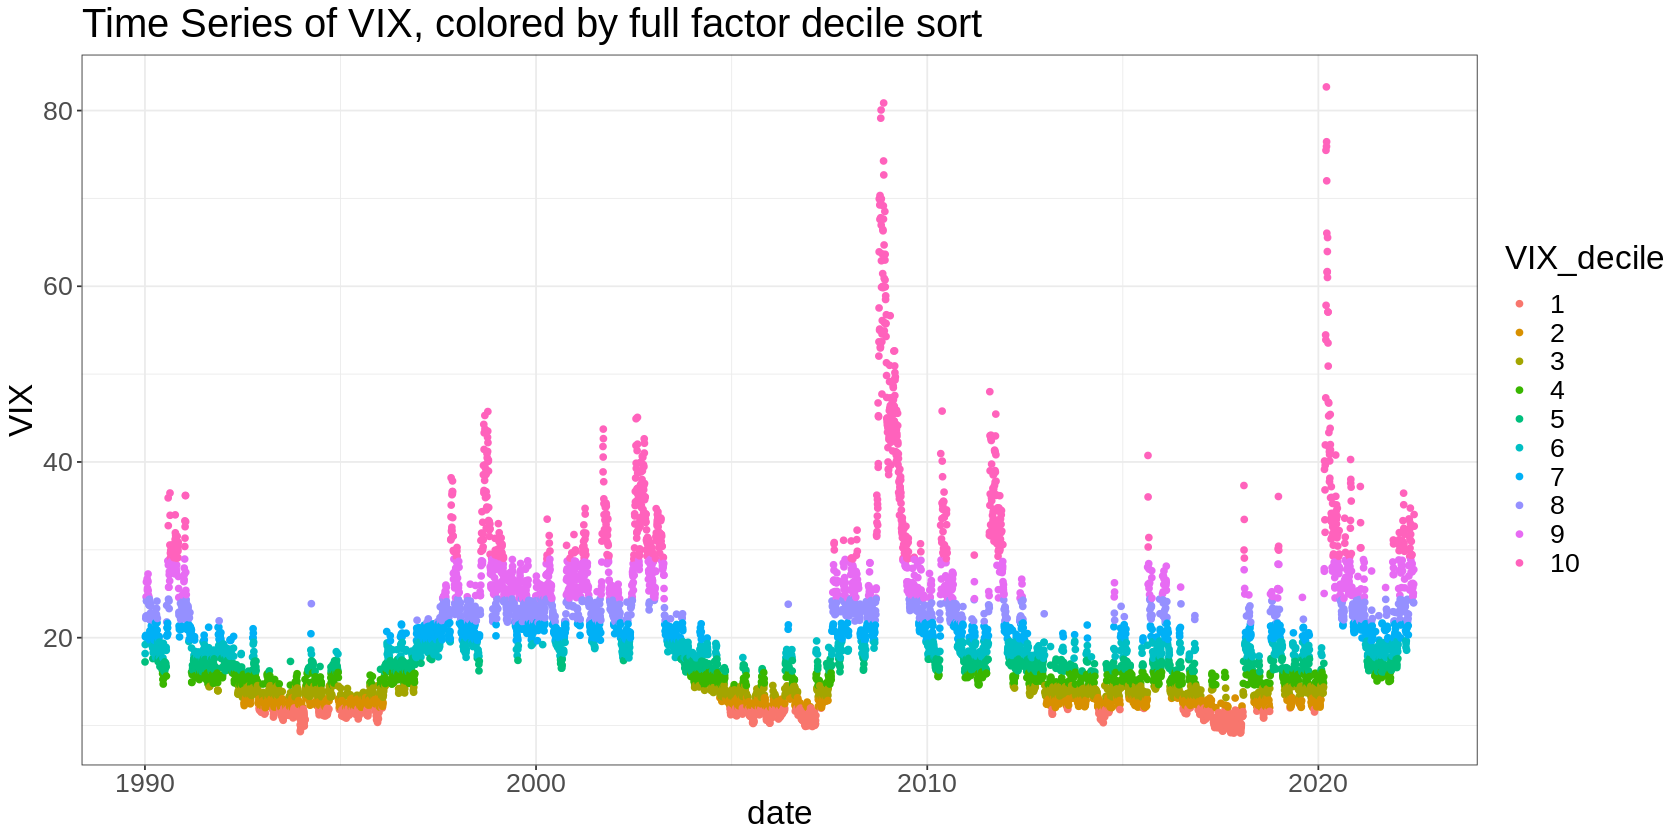

In [ ]:
features %>%
  select(date, VIX, VIX_bucket) %>%
  na.omit() %>%
  mutate(VIX_decile = factor(VIX_bucket)) %>%
  ggplot(aes(x=date, y=VIX, color=VIX_decile)) +
    geom_point() +
    ggtitle('Time Series of VIX, colored by full factor decile sort')

In [ ]:
features %>%
  select(date, VIX, VIX_bucket) %>%
  na.omit() %>%
  group_by(VIX_bucket) %>%
  summarise(
    min = min(VIX),
    max = max(VIX),
    range = max-min
  )

VIX_bucket,min,max,range
<int>,<dbl>,<dbl>,<dbl>
1,9.14,12.03,2.89
2,12.03,13.18,1.15
3,13.18,14.57,1.39
4,14.57,16.10,1.53
5,16.10,17.67,1.57
6,17.67,19.63,1.96
7,19.64,21.72,2.08
8,21.74,24.42,2.68
9,24.42,28.95,4.53


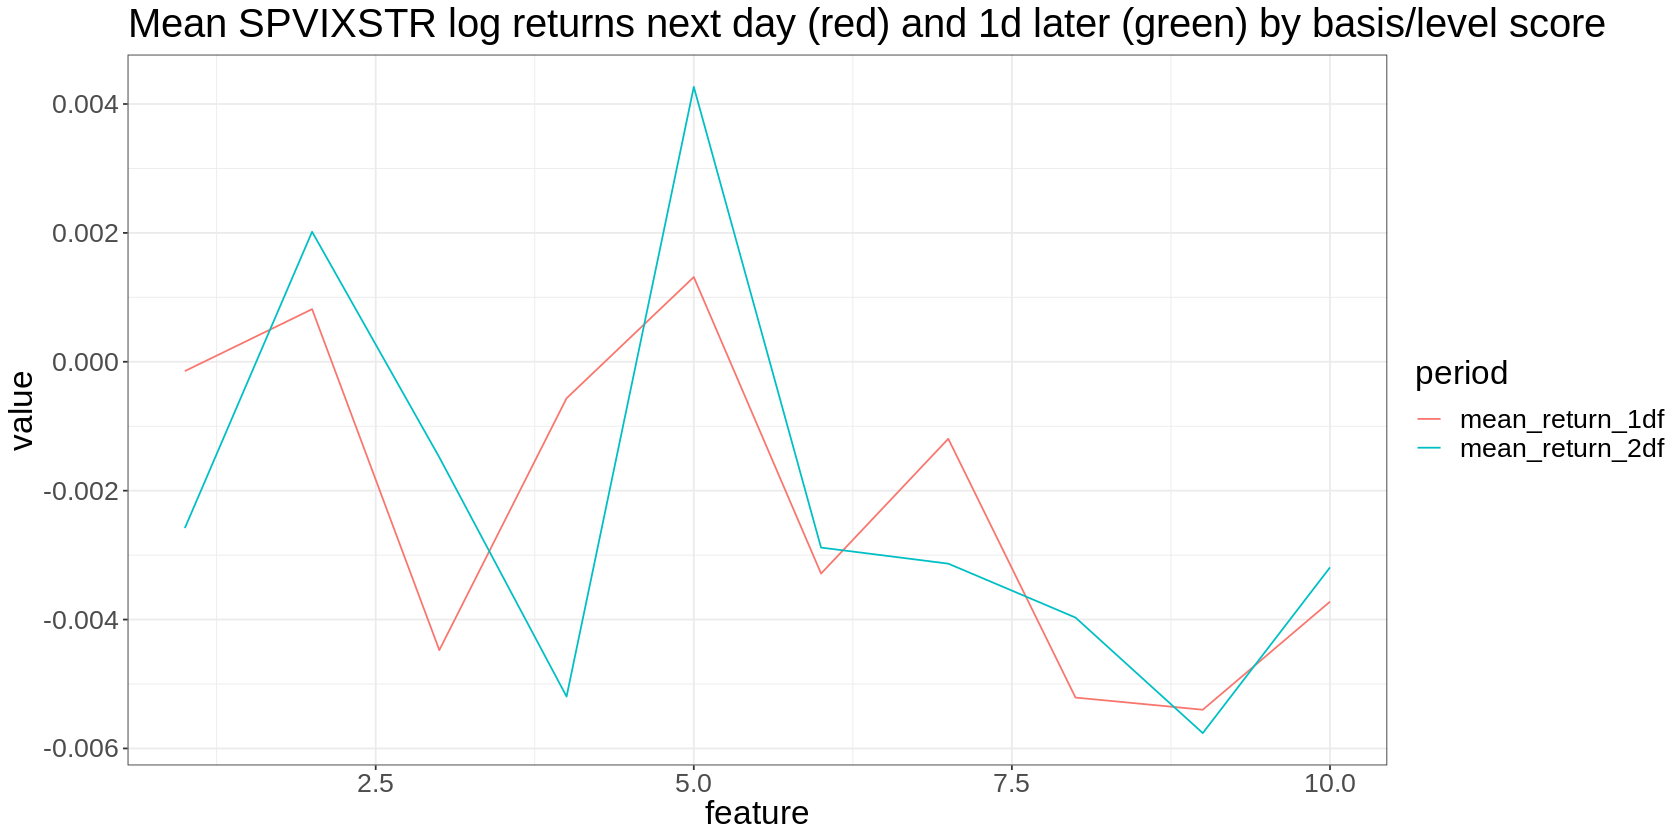

In [ ]:
features <- features %>%
  mutate(
    basis_level_score = ntile((basis_ratio_bucket + VIX_bucket), 10),
  )

features %>%
  mutate(feature = basis_level_score) %>%
  select(
    date,
    feature,
    SPVIXSTR_1df,
    SPVIXSTR_2df
  ) %>%
  na.omit() %>%
  group_by(feature) %>%
  summarise(
    mean_return_1df = mean(SPVIXSTR_1df),
    mean_return_2df = mean(SPVIXSTR_2df)
  )  %>%
  pivot_longer(-feature, names_to = 'period') %>%
  ggplot(aes(x=feature, y=value, color = period)) +
    geom_line() +
    ggtitle('Mean SPVIXSTR log returns next day (red) and 1d later (green) by basis/level score')

# Volatility of Volatility

Before we put a simple simulation of this strategy together - let's try something from Euan's book.

VVIX as predictor of volatility premium returns.

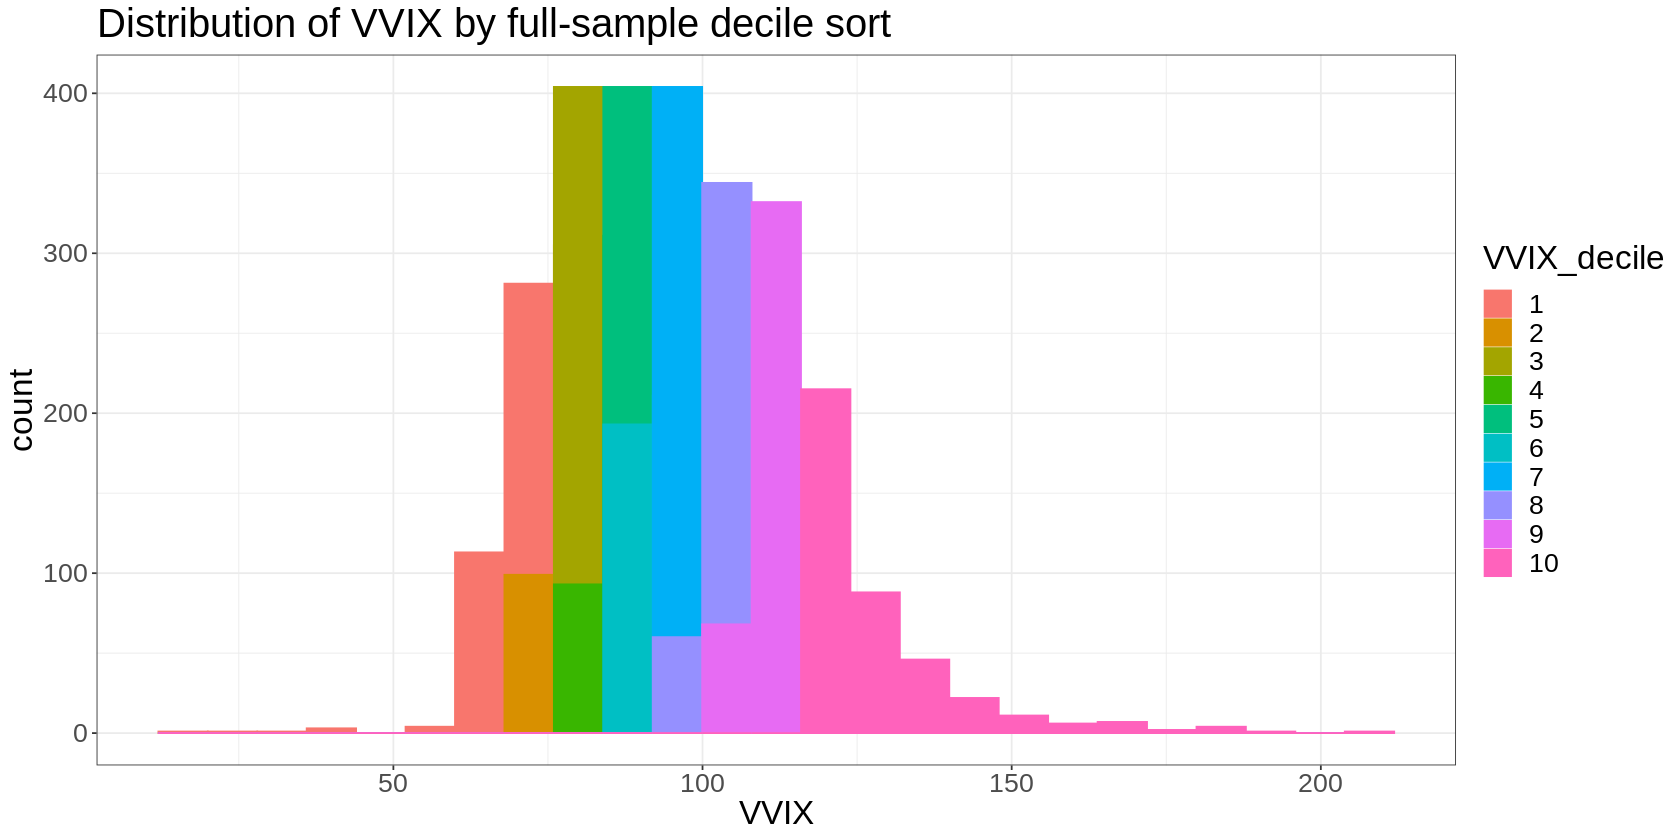

In [ ]:
features %>%
  select(date, VVIX, VVIX_bucket) %>%
  na.omit() %>%
  mutate(VVIX_decile = factor(VVIX_bucket)) %>%
  ggplot(aes(x=VVIX, color = VVIX_decile, fill = VVIX_decile)) +
    geom_histogram(position='identity', bins = 25) +
    ggtitle('Distribution of VVIX by full-sample decile sort')

Highly correlated with VIX

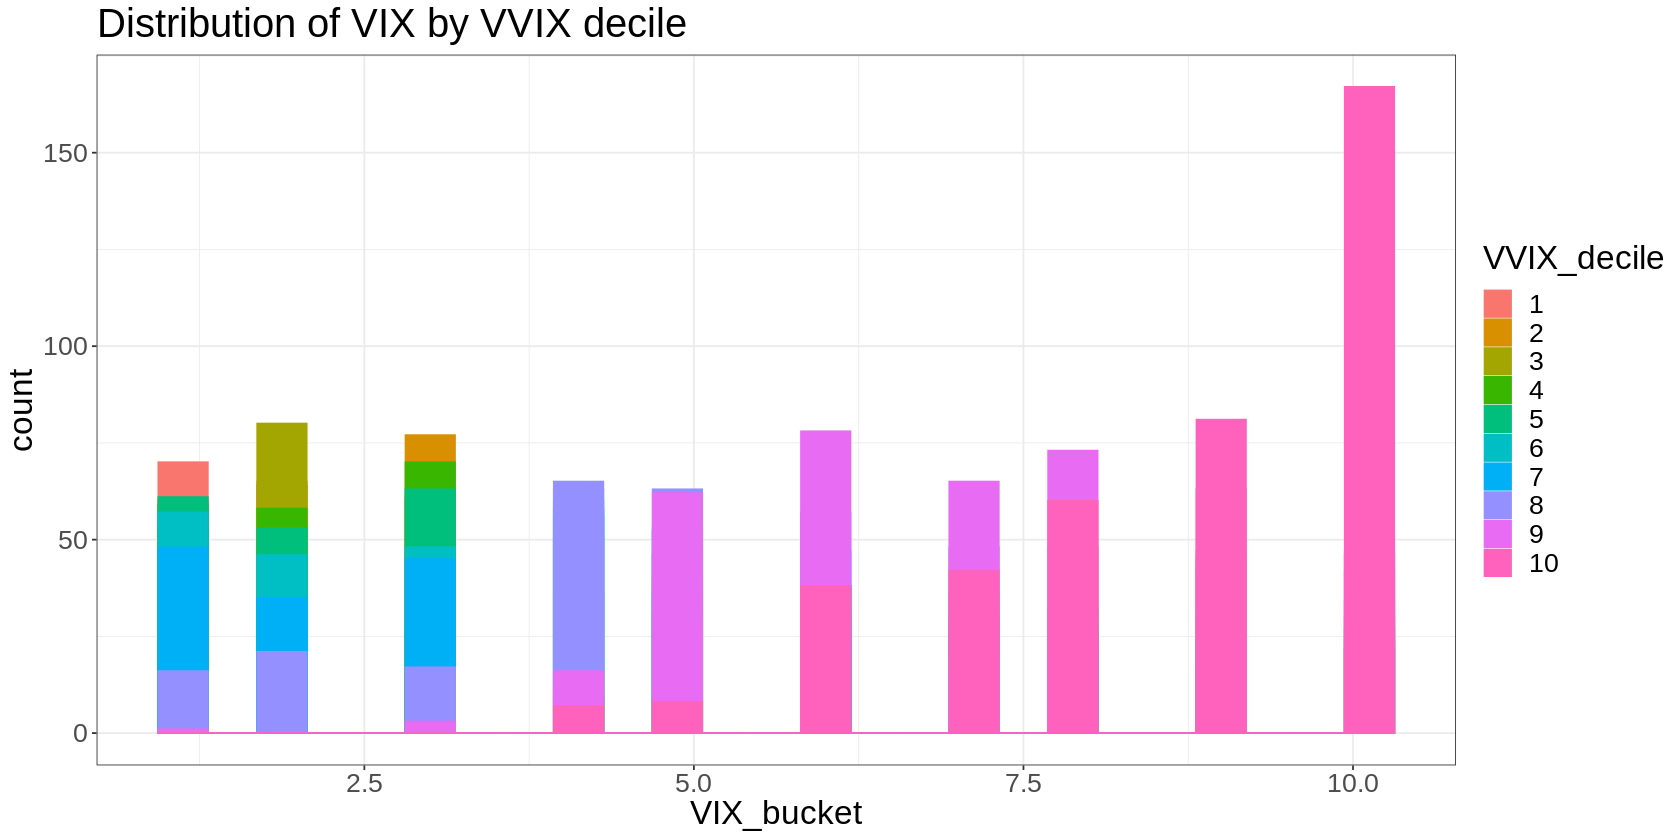

In [ ]:
features %>%
  select(date, VIX_bucket, VVIX_bucket) %>%
  na.omit() %>%
  mutate(VVIX_decile = factor(VVIX_bucket)) %>%
  ggplot(aes(x=VIX_bucket, color = VVIX_decile, fill = VVIX_decile)) +
    geom_histogram(position='identity', bins = 25) +
    ggtitle('Distribution of VIX by VVIX decile')

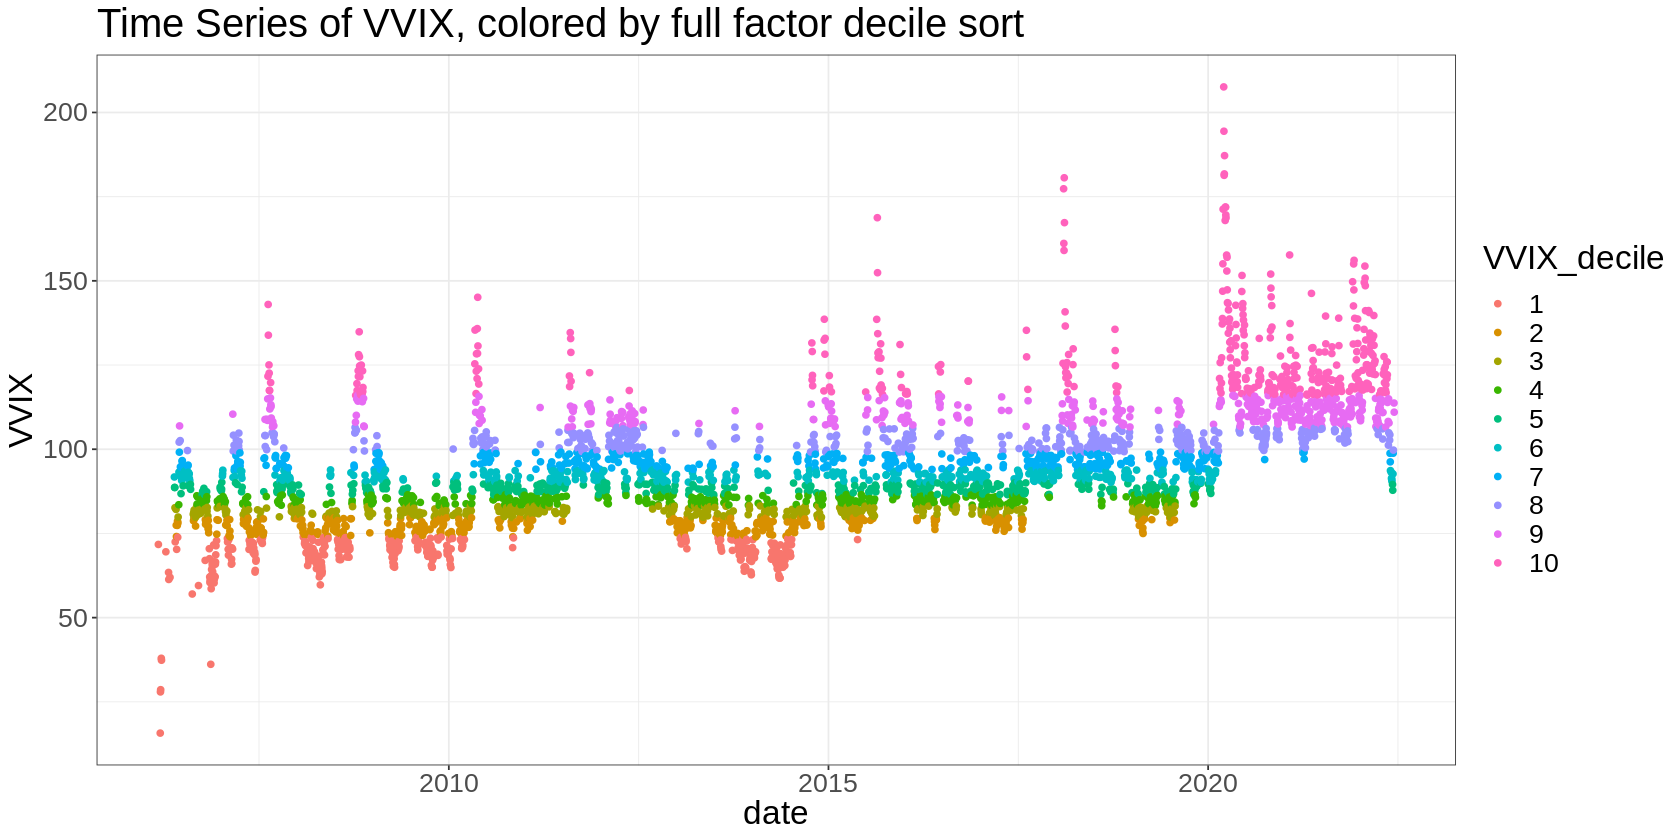

In [ ]:
features %>%
  select(date, VVIX, VVIX_bucket) %>%
  na.omit() %>%
  mutate(VVIX_decile = factor(VVIX_bucket)) %>%
  ggplot(aes(x=date, y=VVIX, color=VVIX_decile)) +
    geom_point() +
    ggtitle('Time Series of VVIX, colored by full factor decile sort')

In [ ]:
features %>%
  select(date, VVIX, VVIX_bucket) %>%
  na.omit() %>%
  group_by(VVIX_bucket) %>%
  summarise(
    min = min(VVIX),
    max = max(VVIX),
    range = max-min
  )

VVIX_bucket,min,max,range
<int>,<dbl>,<dbl>,<dbl>
1,15.71,73.94,58.23
2,73.98,79.69,5.71
3,79.70,83.21,3.51
4,83.21,86.51,3.30
5,86.51,90.17,3.66
6,90.19,93.94,3.75
7,93.94,99.14,5.20
8,99.16,106.55,7.39
9,106.57,115.98,9.41


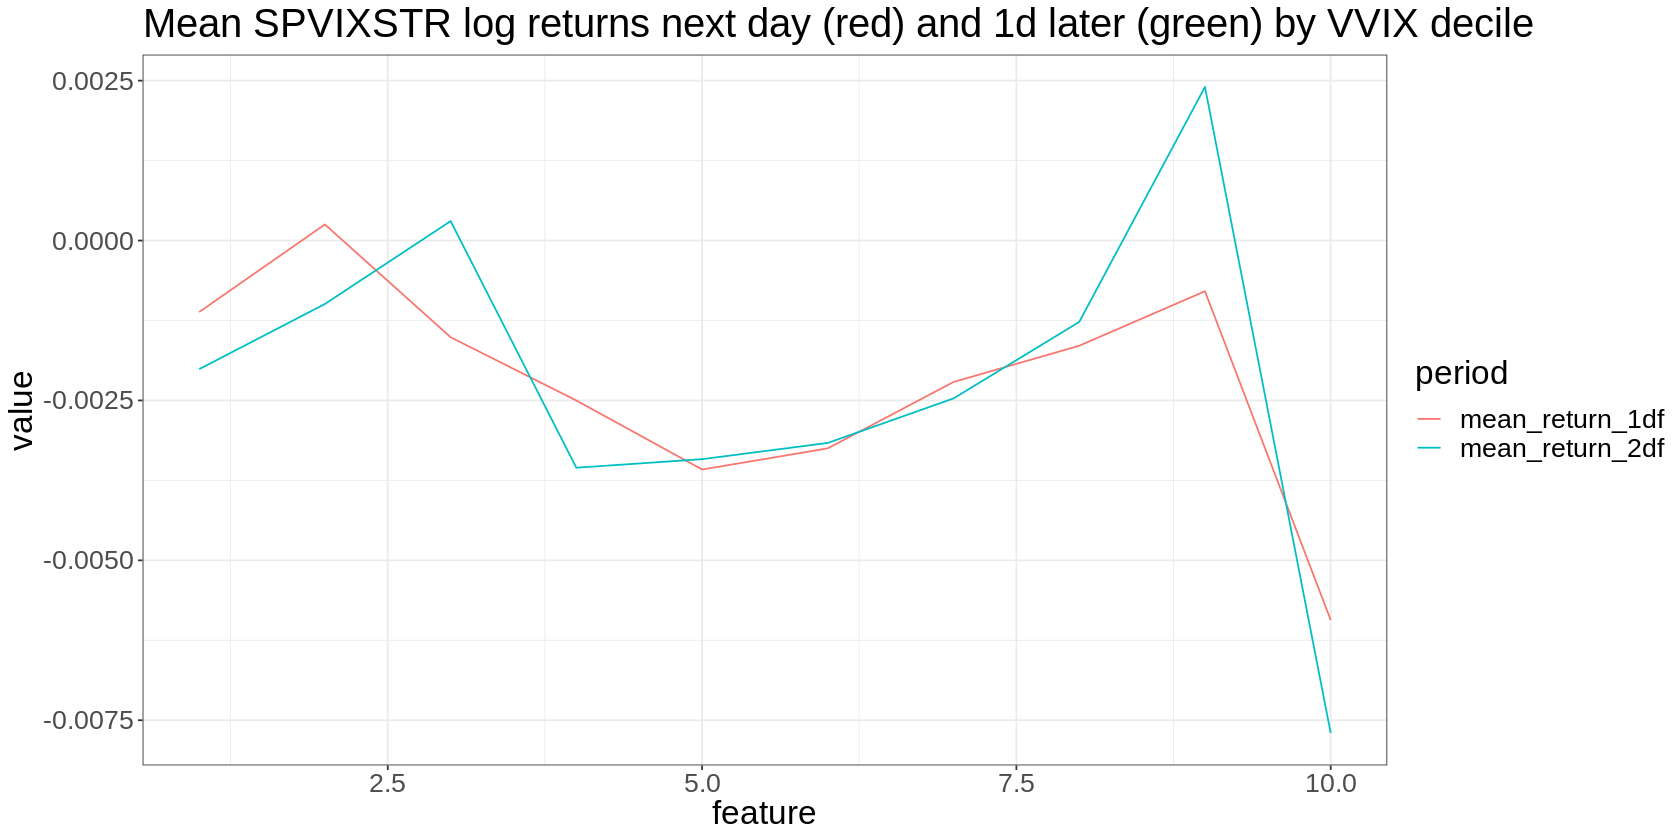

In [ ]:
features %>%
  mutate(feature = VVIX_bucket) %>%
  select(
    date,
    feature,
    SPVIXSTR_1df,
    SPVIXSTR_2df
  ) %>%
  na.omit() %>%
  group_by(feature) %>%
  summarise(
    mean_return_1df = mean(SPVIXSTR_1df),
    mean_return_2df = mean(SPVIXSTR_2df)
  ) %>%
  pivot_longer(-feature, names_to = 'period') %>%
  ggplot(aes(x=feature, y=value, color = period)) +
    geom_line() +
    ggtitle('Mean SPVIXSTR log returns next day (red) and 1d later (green) by VVIX decile')

`summarise()` has grouped output by 'feature'. You can override using the
`.groups` argument.


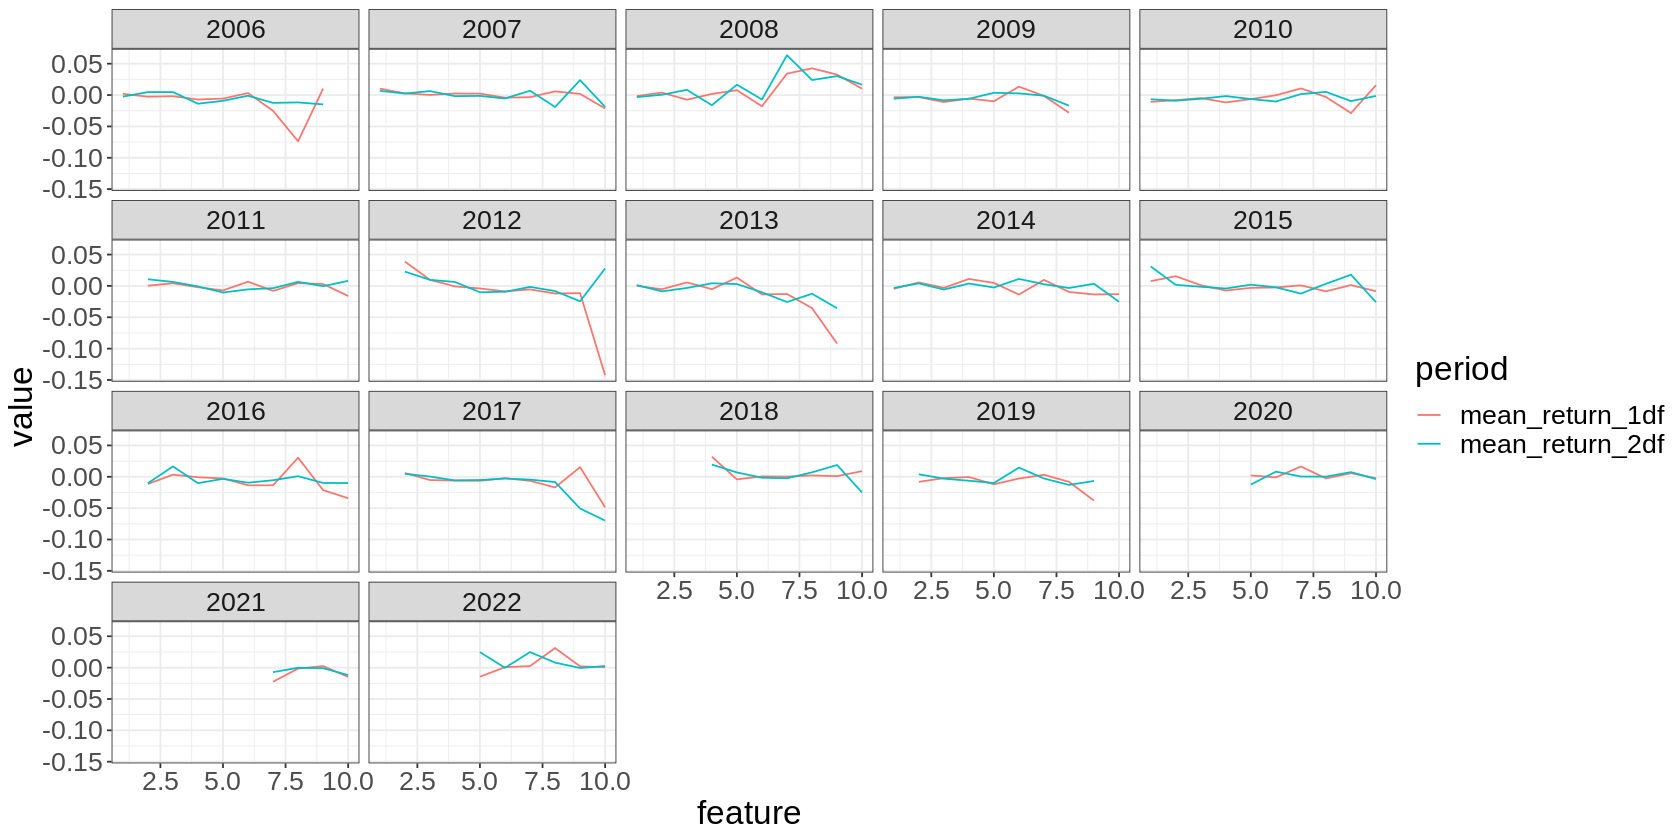

In [ ]:
features %>%
  mutate(
    feature = VVIX_bucket,
    year = lubridate::year(date)) %>%
  select(
    year,
    feature,
    SPVIXSTR_1df,
    SPVIXSTR_2df
  ) %>%
  na.omit() %>%
  group_by(feature, year) %>%
  summarise(
    mean_return_1df = mean(SPVIXSTR_1df),
    mean_return_2df = mean(SPVIXSTR_2df)
  ) %>%
  pivot_longer(-c(feature, year), names_to = 'period') %>%
  ggplot(aes(x=feature, y=value, color = period)) + geom_line() + facet_wrap(~year)

# Create a combined sort.

High VIX and high VVIX are highly correlated.

So create a composite score which is:

- 50% VIX Basis Decile
- 25% VIX Level Decile
- 25% VVIX Level Decile

Rounded to nearest integer

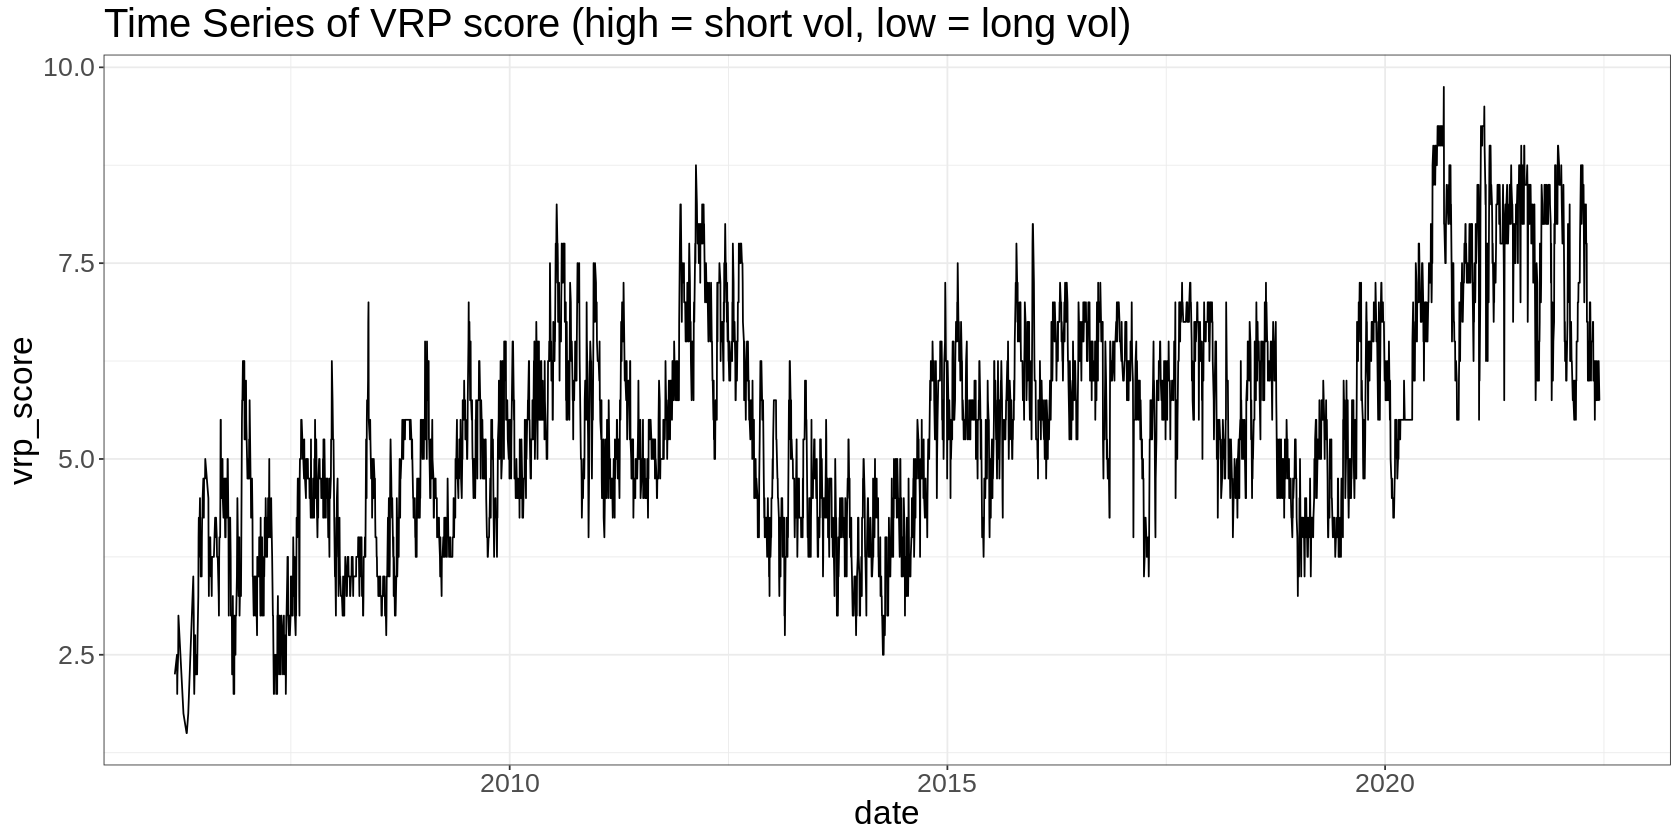

In [ ]:
features <- features %>%
  mutate(
    vrp_score = (0.5 * basis_ratio_bucket) + (0.25 * VIX_bucket) + (0.25 * VVIX_bucket),
    vrp_score_floor = floor(vrp_score)
  )

features %>%
  select(date, vrp_score) %>%
  na.omit() %>%
  ggplot(aes(x=date, y=vrp_score)) +
    geom_line() +
    ggtitle('Time Series of VRP score (high = short vol, low = long vol)')

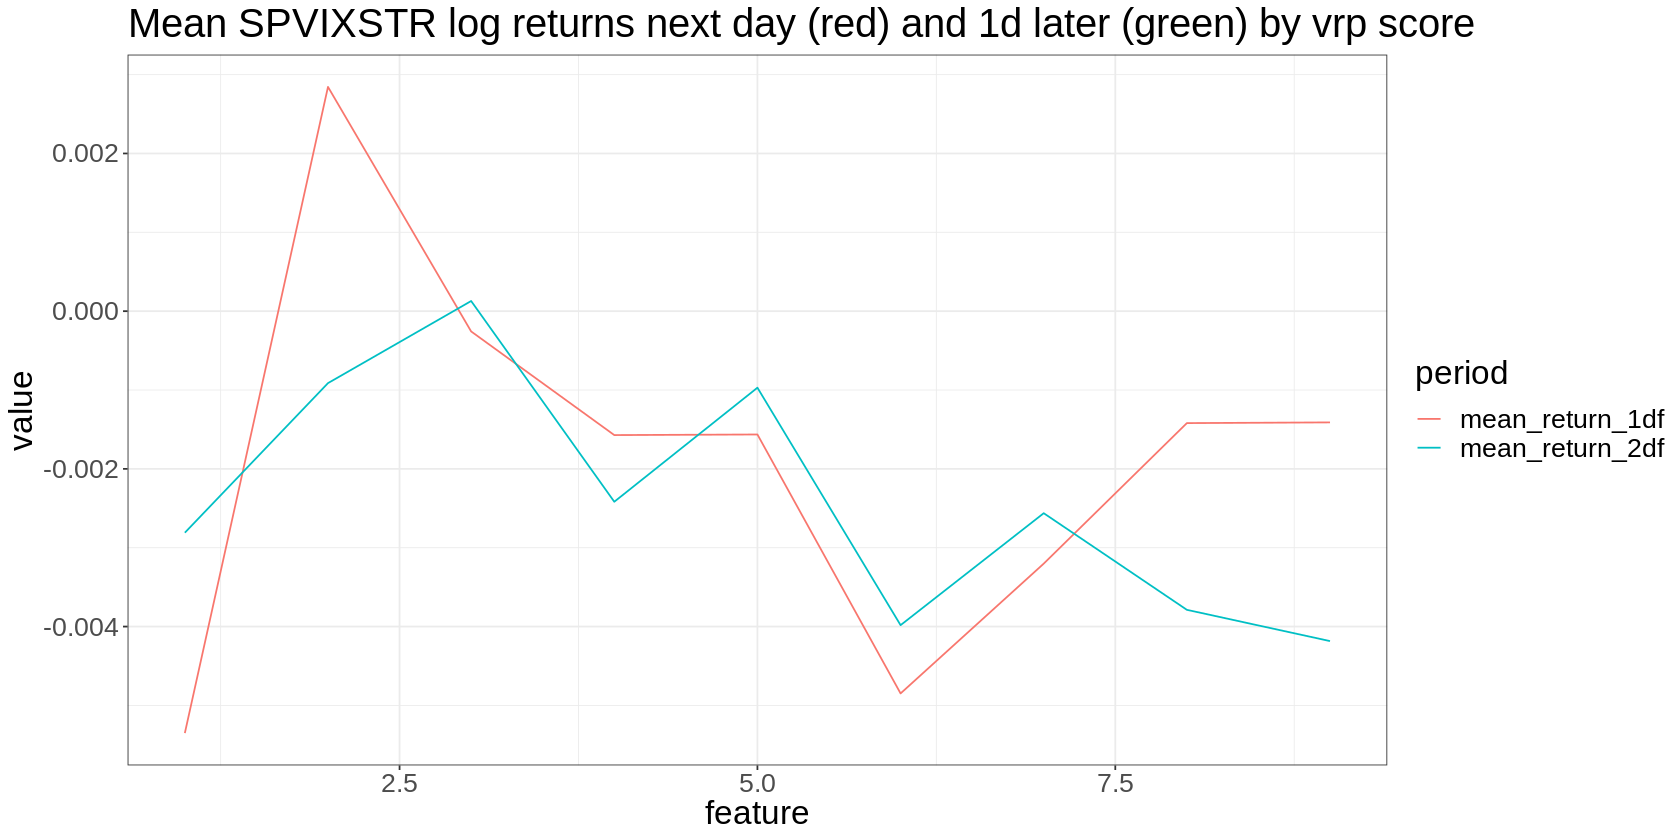

In [ ]:
features %>%
  mutate(feature = vrp_score_floor) %>%
  select(
    date,
    feature,
    SPVIXSTR_1df,
    SPVIXSTR_2df
  ) %>%
  na.omit() %>%
  group_by(feature) %>%
  summarise(
    mean_return_1df = mean(SPVIXSTR_1df),
    mean_return_2df = mean(SPVIXSTR_2df)
  ) %>%
  pivot_longer(-feature, names_to = 'period') %>%
  ggplot(aes(x=feature, y=value, color = period)) +
    geom_line() +
    ggtitle('Mean SPVIXSTR log returns next day (red) and 1d later (green) by vrp score')

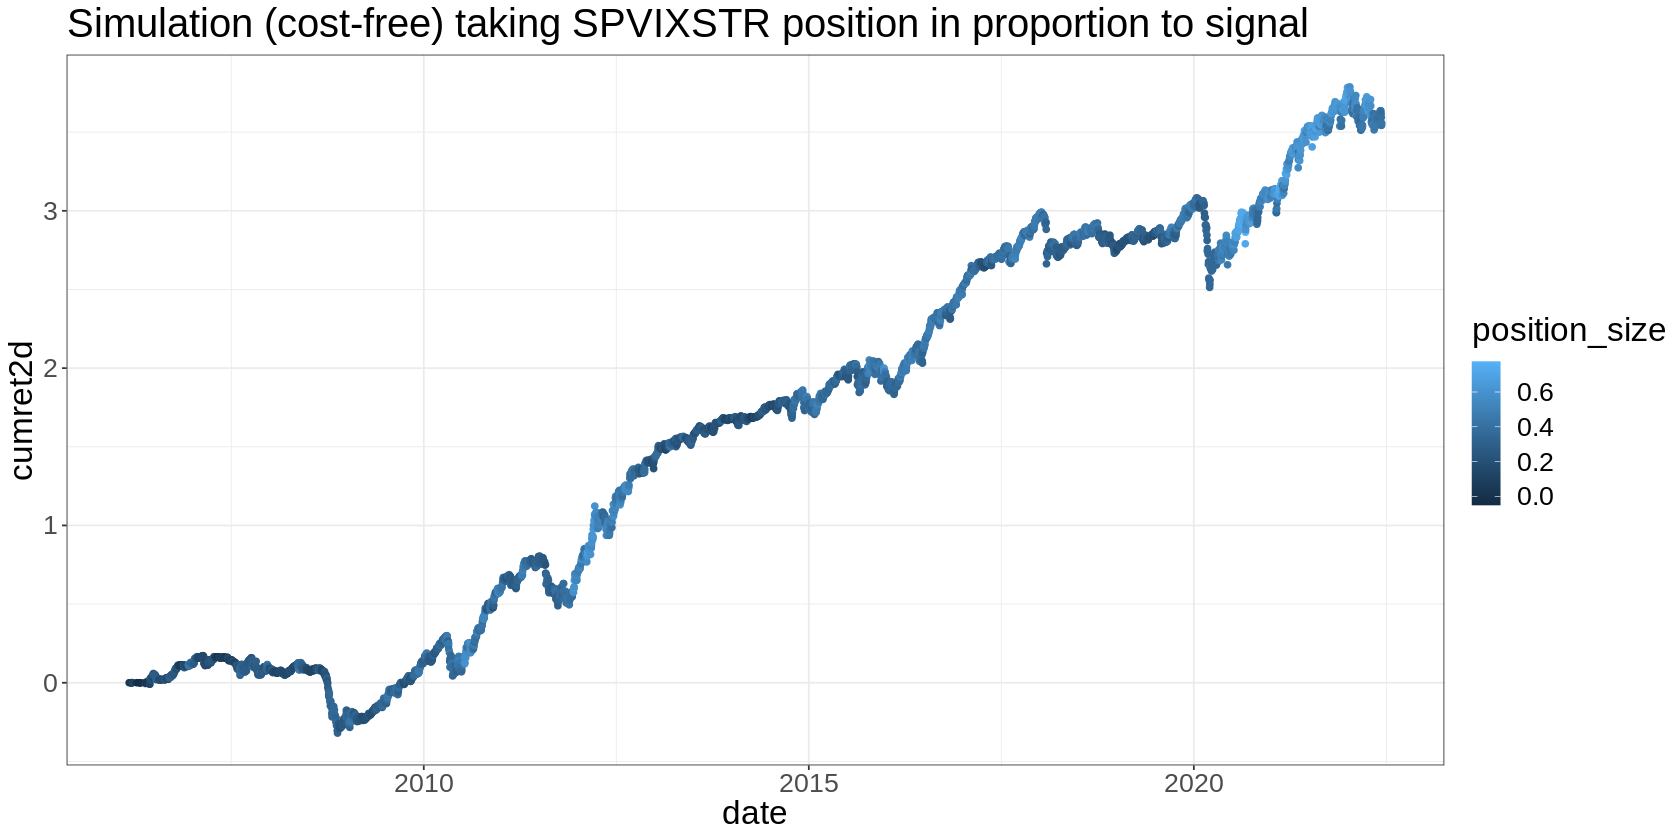

In [ ]:
features %>%
  mutate(
    position_size = (vrp_score - 2) / 10,
    strat2df = position_size * -SPVIXSTR_2df
  ) %>%
  select(date, vrp_score, position_size, strat2df) %>%
  na.omit() %>%
  mutate(
    cumret2d = cumsum(strat2df)
  ) %>%
  # filter(date >= '2010-01-01') %>%
  # filter(date >= '2022-01-01') %>%
  ggplot(aes(x=date, y=cumret2d, color=position_size)) + geom_point() +
  ggtitle('Simulation (cost-free) taking SPVIXSTR position in proportion to signal')

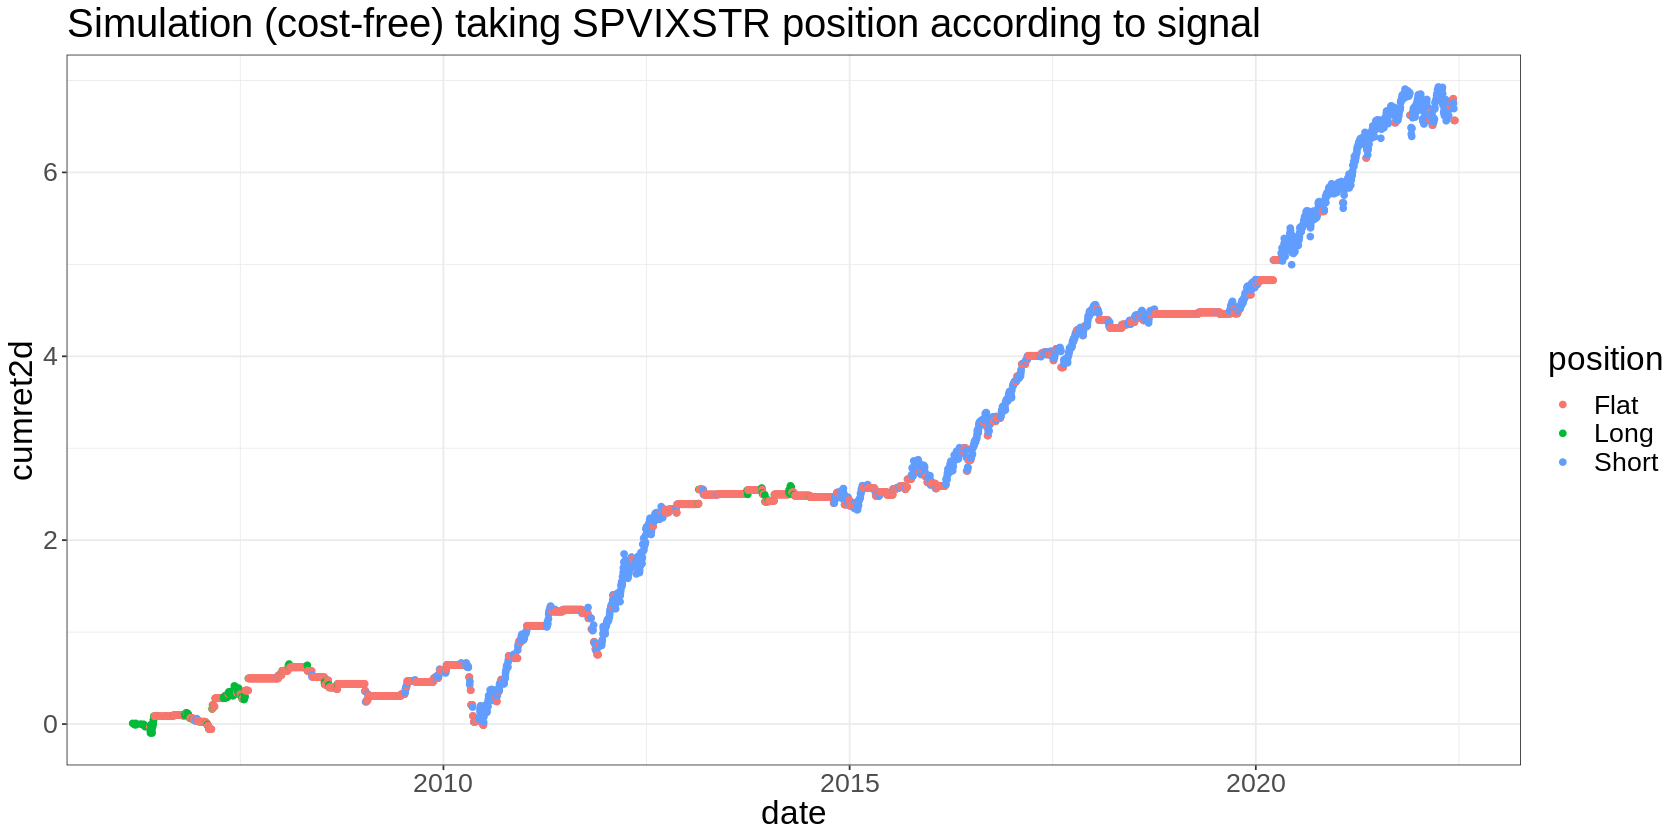

In [ ]:
features %>%
  mutate(
    position = case_when(vrp_score >= 6 ~ 'Short', vrp_score <= 3 ~ 'Long', TRUE ~ 'Flat'),
    strat1df = case_when(position == 'Short' ~ -SPVIXSTR_1df, position == 'Long' ~ SPVIXSTR_1df, TRUE ~ 0),
    strat2df = case_when(position == 'Short' ~ -SPVIXSTR_1df, position == 'Long' ~ SPVIXSTR_1df, TRUE ~ 0)
  ) %>%
  select(date, vrp_score, position, strat1df, strat2df) %>%
  na.omit() %>%
  mutate(
    cumret1d = cumsum(strat1df),
    cumret2d = cumsum(strat2df)
  ) %>%
  # filter(date >= '2010-01-01') %>%
  # filter(date >= '2022-01-01') %>%
  ggplot(aes(x=date, y=cumret2d, color=position)) + geom_point() +
  ggtitle('Simulation (cost-free) taking SPVIXSTR position according to signal')

# Indicative Performance

- Assume $X assigned to strategy
- Long = Long 0.25 x VIXY
- Short = Long 0.5 x SVXY
- Flat = Cash
- Rebalance positions back to target if abs diff > 5%

Warning message:
“Removed 252 row(s) containing missing values (geom_path).”


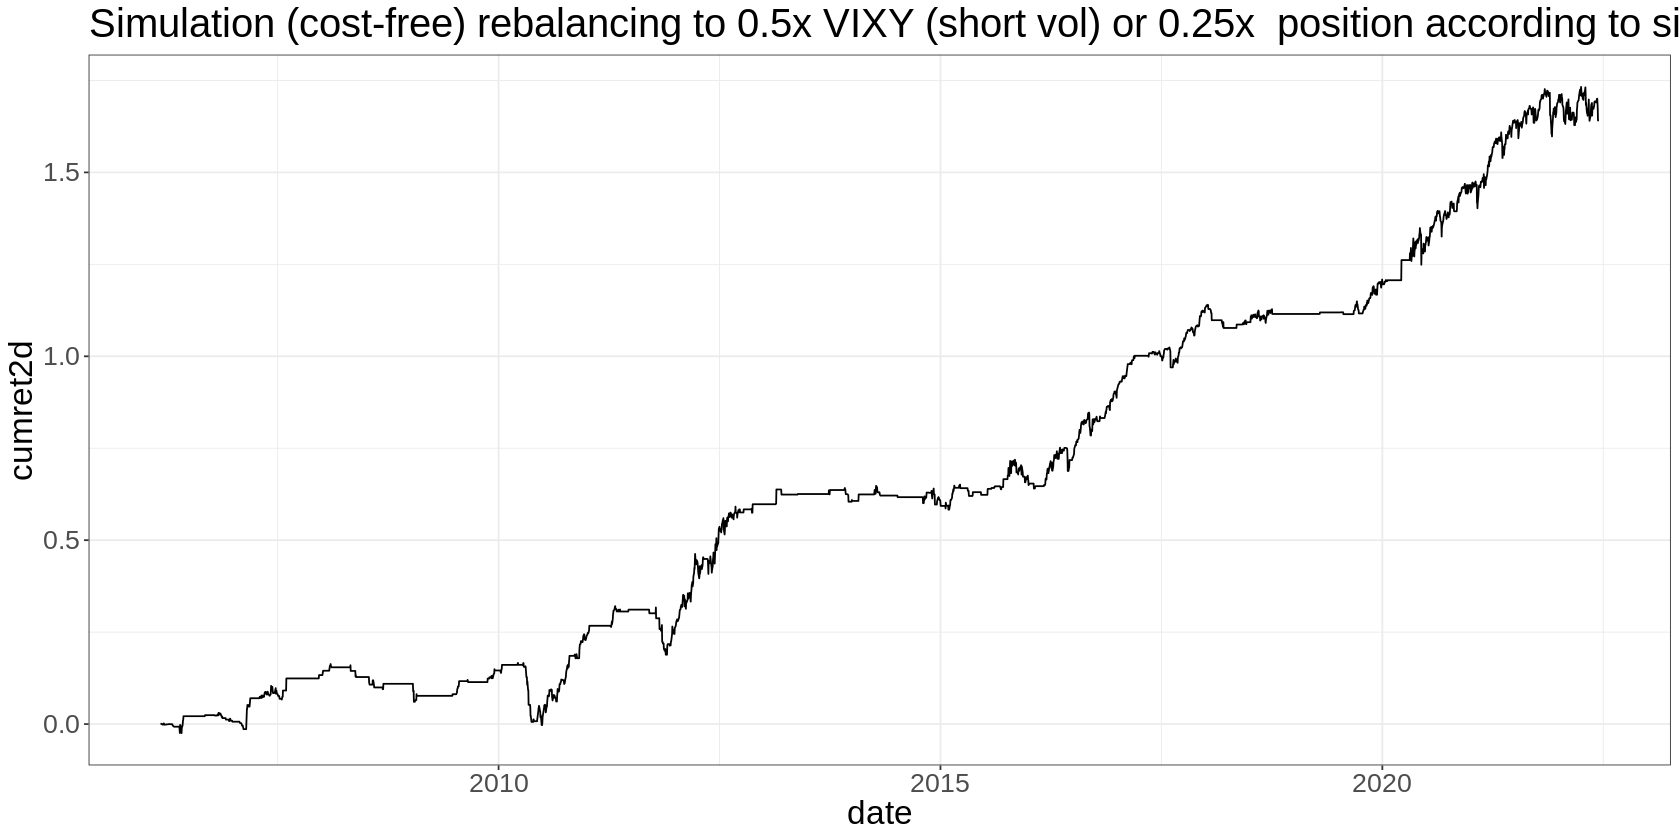

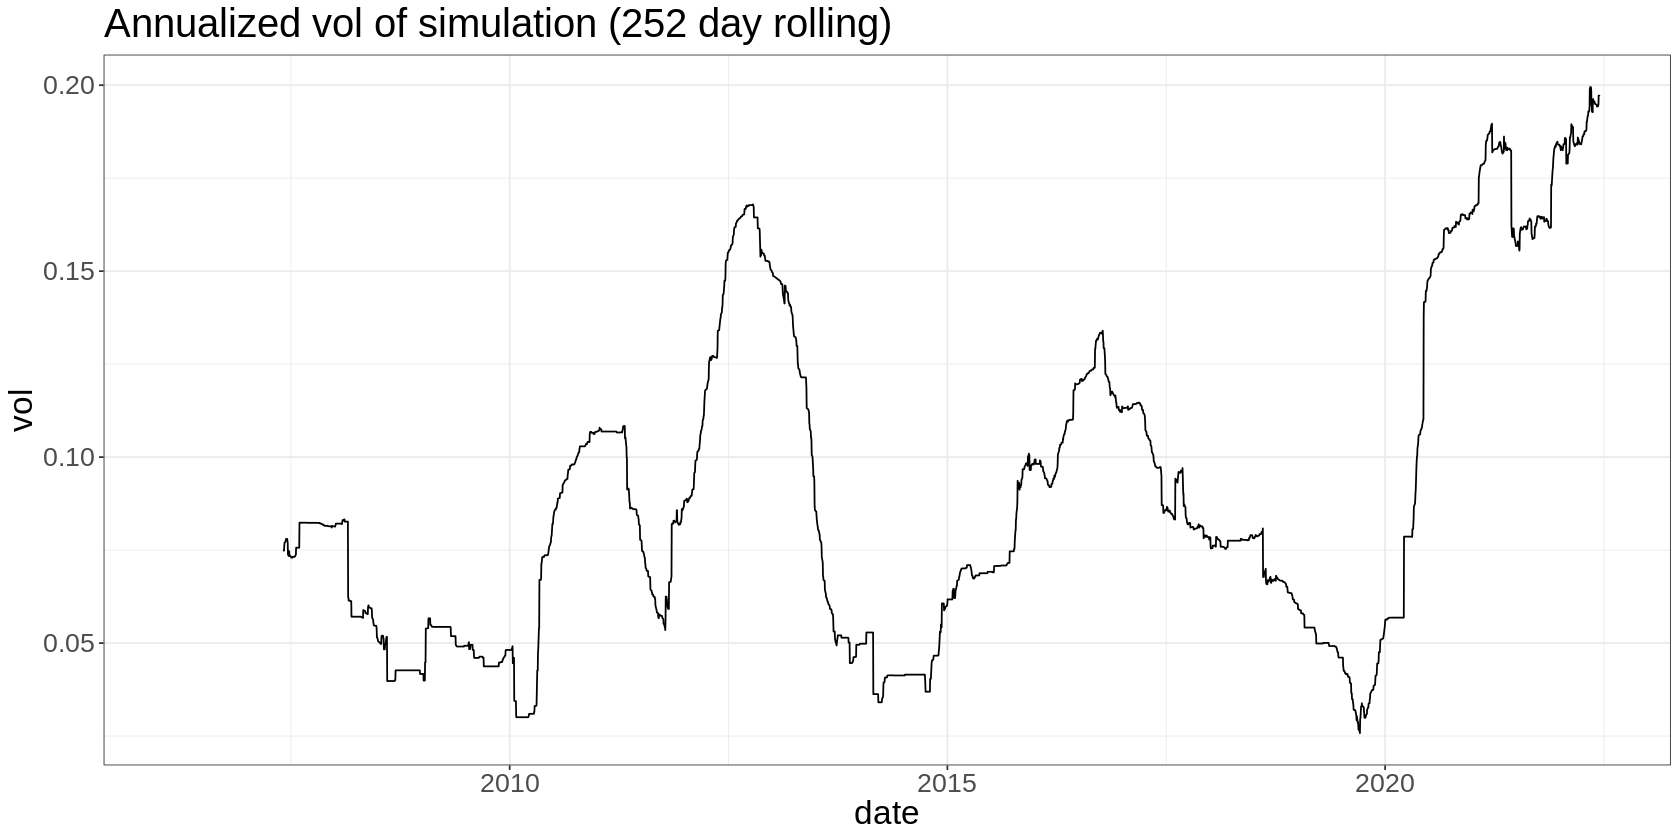

In [ ]:
returns <- features %>%
  mutate(
    position = case_when(vrp_score >= 6 ~ 'Short', vrp_score <= 3 ~ 'Long', TRUE ~ 'Flat'),
    strat1df = case_when(position == 'Short' ~ -SPVIXSTR_1df, position == 'Long' ~ SPVIXSTR_1df, TRUE ~ 0) * 0.25,
    strat2df = case_when(position == 'Short' ~ -SPVIXSTR_1df, position == 'Long' ~ SPVIXSTR_1df, TRUE ~ 0) * 0.25
  ) %>%
  select(date, vrp_score, position, strat1df, strat2df) %>%
  na.omit() %>%
  mutate(
    cumret1d = cumsum(strat1df),
    cumret2d = cumsum(strat2df)
  )


returns %>%
  ggplot(aes(x=date, y=cumret2d)) + geom_line() +
  ggtitle('Simulation (cost-free) rebalancing to 0.5x VIXY (short vol) or 0.25x  position according to signal')

returns %>%
  mutate(vol = slider::slide_dbl(strat2df, sd, .before=252, .complete=TRUE) * sqrt(252)) %>%
  ggplot(aes(x=date, y=vol)) +
    geom_line() +
    ggtitle('Annualized vol of simulation (252 day rolling)')

20% annualized vol is too big for a risky risk premia harvesting strat like this.

We'll be talking about sizing and portfolio management next week but a bettter approach is something like.

- Assume $X assigned to strategy
- Long = Long 0.125 x VIXY
- Short = Long 0.25 x SVXY
- Flat = Cash
- Rebalance positions back to target if abs diff > 5%

Warning message:
“Removed 252 row(s) containing missing values (geom_path).”


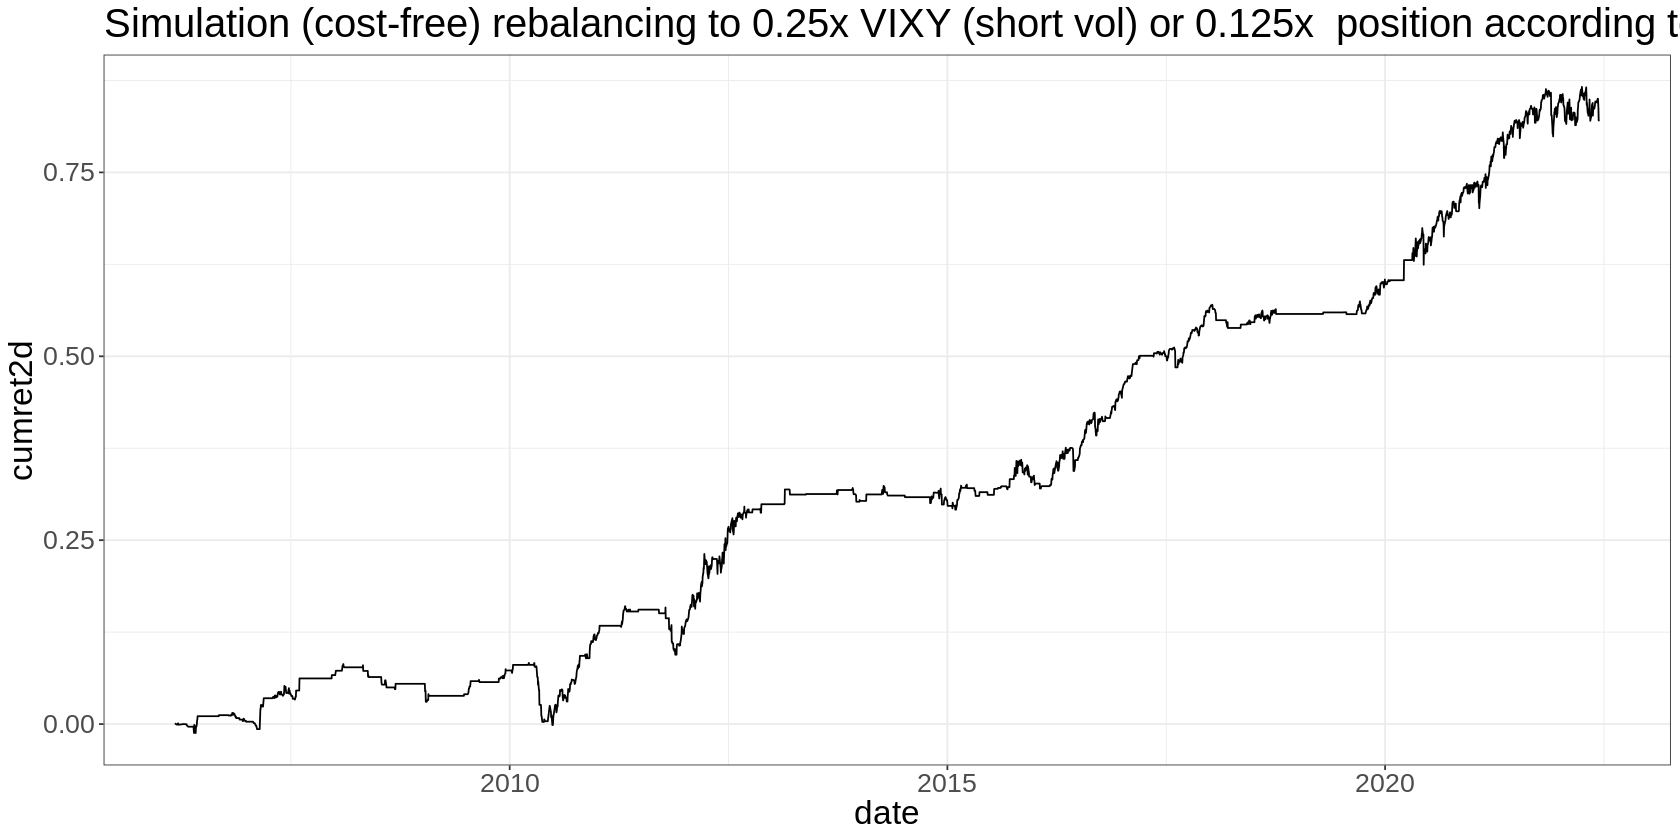

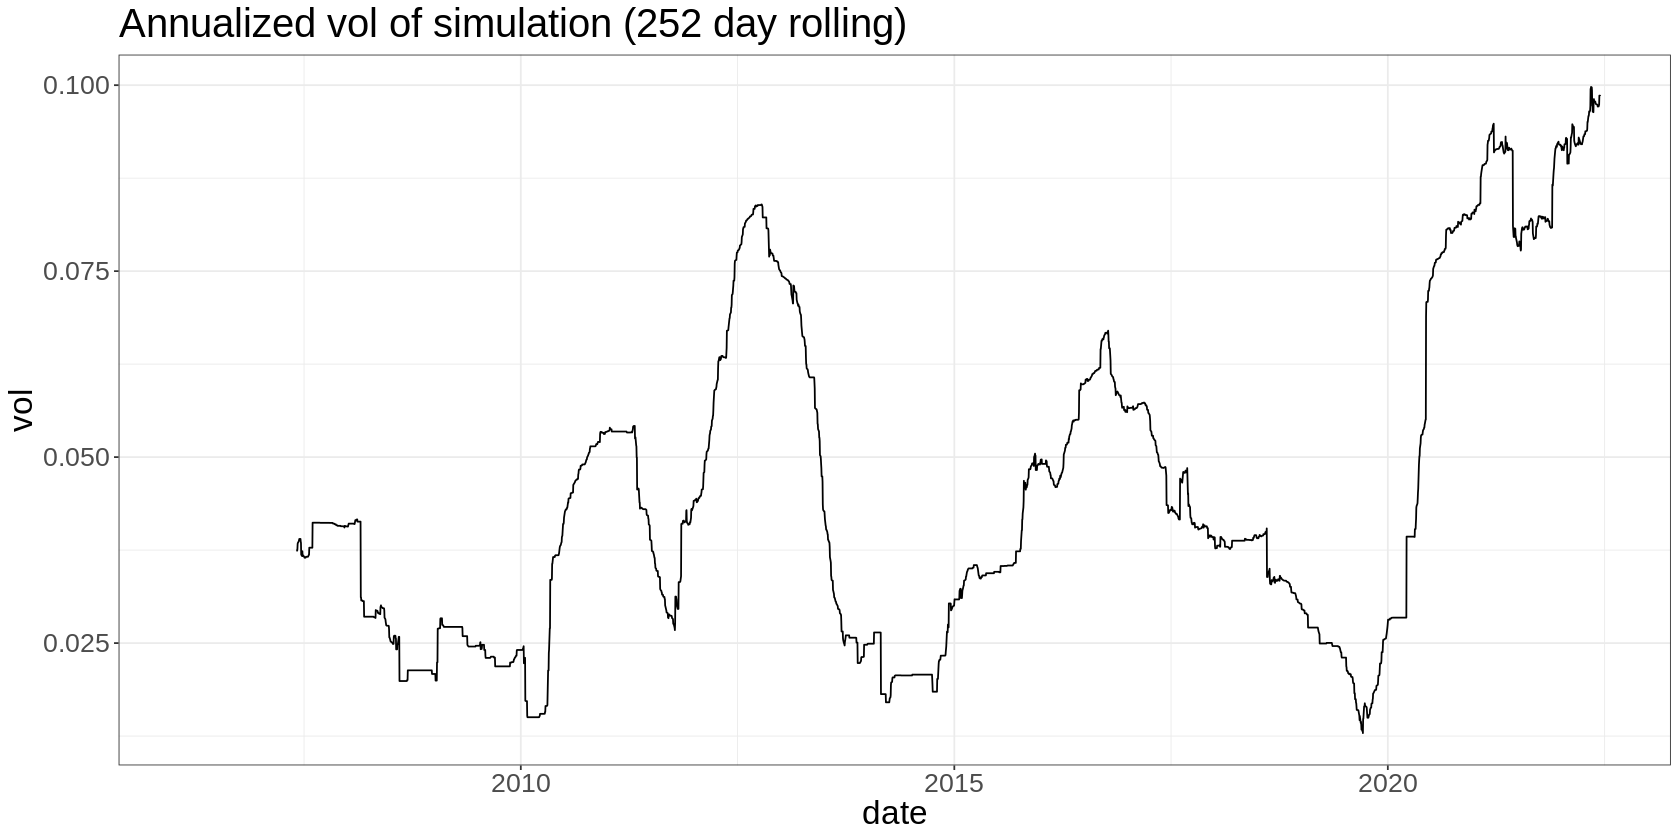

In [ ]:
returns <- features %>%
  mutate(
    position = case_when(vrp_score >= 6 ~ 'Short', vrp_score <= 3 ~ 'Long', TRUE ~ 'Flat'),
    strat1df = case_when(position == 'Short' ~ -SPVIXSTR_1df, position == 'Long' ~ SPVIXSTR_1df, TRUE ~ 0) * 0.125,
    strat2df = case_when(position == 'Short' ~ -SPVIXSTR_1df, position == 'Long' ~ SPVIXSTR_1df, TRUE ~ 0) * 0.125
  ) %>%
  select(date, vrp_score, position, strat1df, strat2df) %>%
  na.omit() %>%
  mutate(
    cumret1d = cumsum(strat1df),
    cumret2d = cumsum(strat2df)
  )


returns %>%
  ggplot(aes(x=date, y=cumret2d)) + geom_line() +
  ggtitle('Simulation (cost-free) rebalancing to 0.25x VIXY (short vol) or 0.125x  position according to signal')

returns %>%
  mutate(vol = slider::slide_dbl(strat2df, sd, .before=252, .complete=TRUE) * sqrt(252)) %>%
  ggplot(aes(x=date, y=vol)) +
    geom_line() +
    ggtitle('Annualized vol of simulation (252 day rolling)')

This is a risky risk premia harvesting strategy.

You must not size to the simulation.

We can be unlucky.

Size to the point you'd be happy holding a constant short vol position, even if it looks worse in the future.

In [ ]:
features %>% head()

Date,SPVIXSTR,SPY,VIX,VIX3M,ATM_1M,ATM_2M,ATM_3M,ATM_6M,ATM_1Y,⋯,basis_ratio,basis_ratio_bucket,VIX_bucket,VVIX_bucket,SPVIXSTR_1df,SPVIXSTR_2df,basis_level_score,basis_level_score2,vrp_score,vrp_score_floor
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
2/01/1990,NA,NA,17.24,NA,NA,NA,NA,NA,NA,⋯,NA,NA,5,NA,NA,NA,NA,NA,NA,NA
3/01/1990,NA,NA,18.19,NA,NA,NA,NA,NA,NA,⋯,NA,NA,6,NA,NA,NA,NA,NA,NA,NA
4/01/1990,NA,NA,19.22,NA,NA,NA,NA,NA,NA,⋯,NA,NA,6,NA,NA,NA,NA,NA,NA,NA
5/01/1990,NA,NA,20.11,NA,NA,NA,NA,NA,NA,⋯,NA,NA,7,NA,NA,NA,NA,NA,NA,NA
8/01/1990,NA,NA,20.26,NA,NA,NA,NA,NA,NA,⋯,NA,NA,7,NA,NA,NA,NA,NA,NA,NA
9/01/1990,NA,NA,22.20,NA,NA,NA,NA,NA,NA,⋯,NA,NA,8,NA,NA,NA,NA,NA,NA,NA


Warning message:
“Removed 252 row(s) containing missing values (geom_path).”


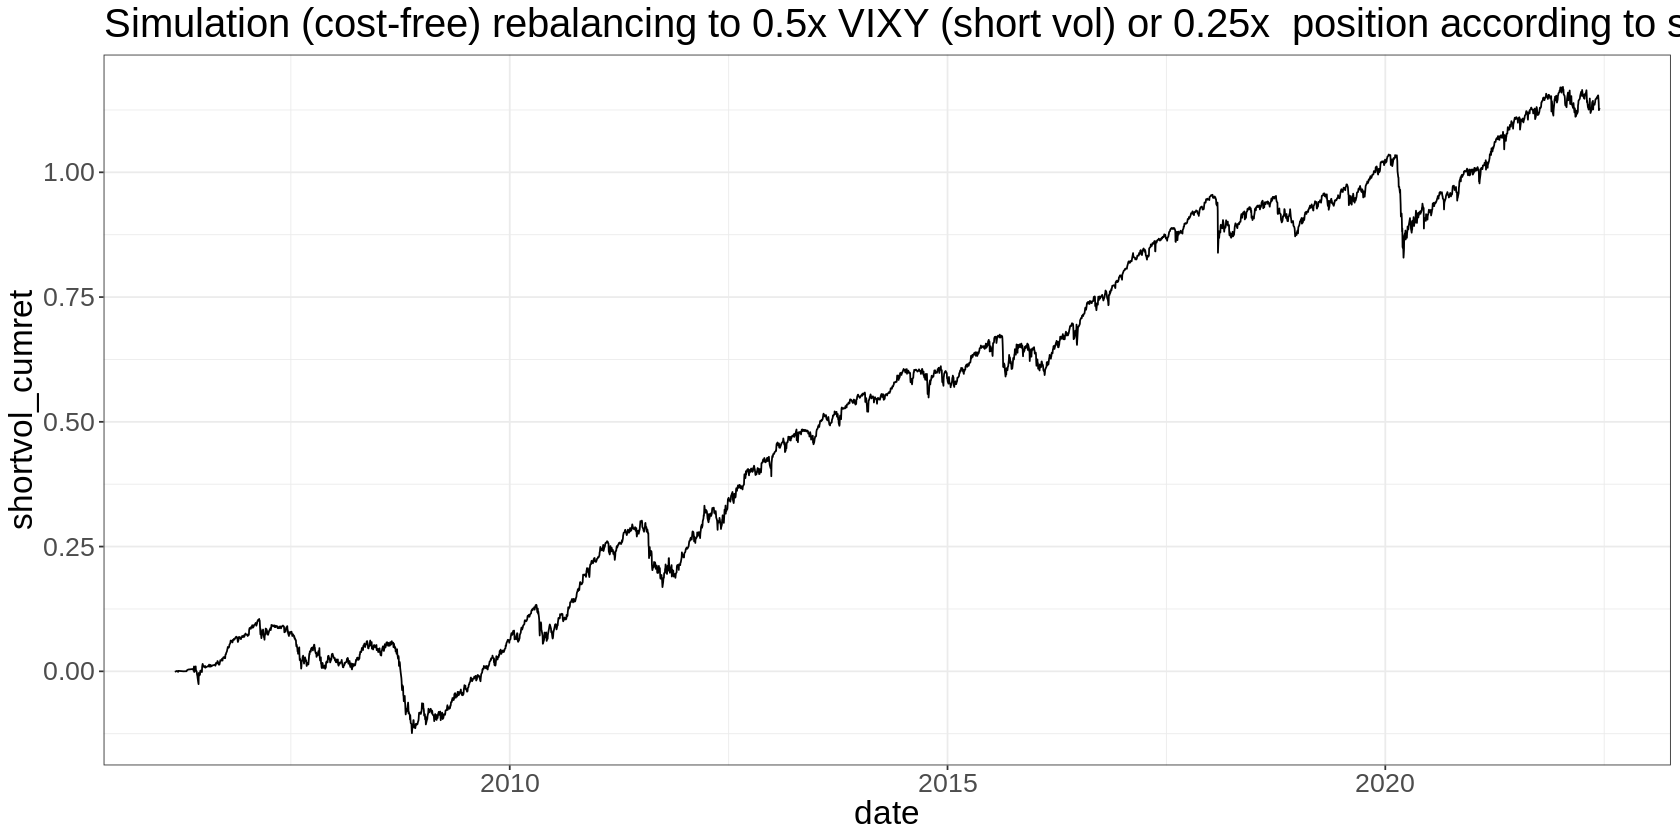

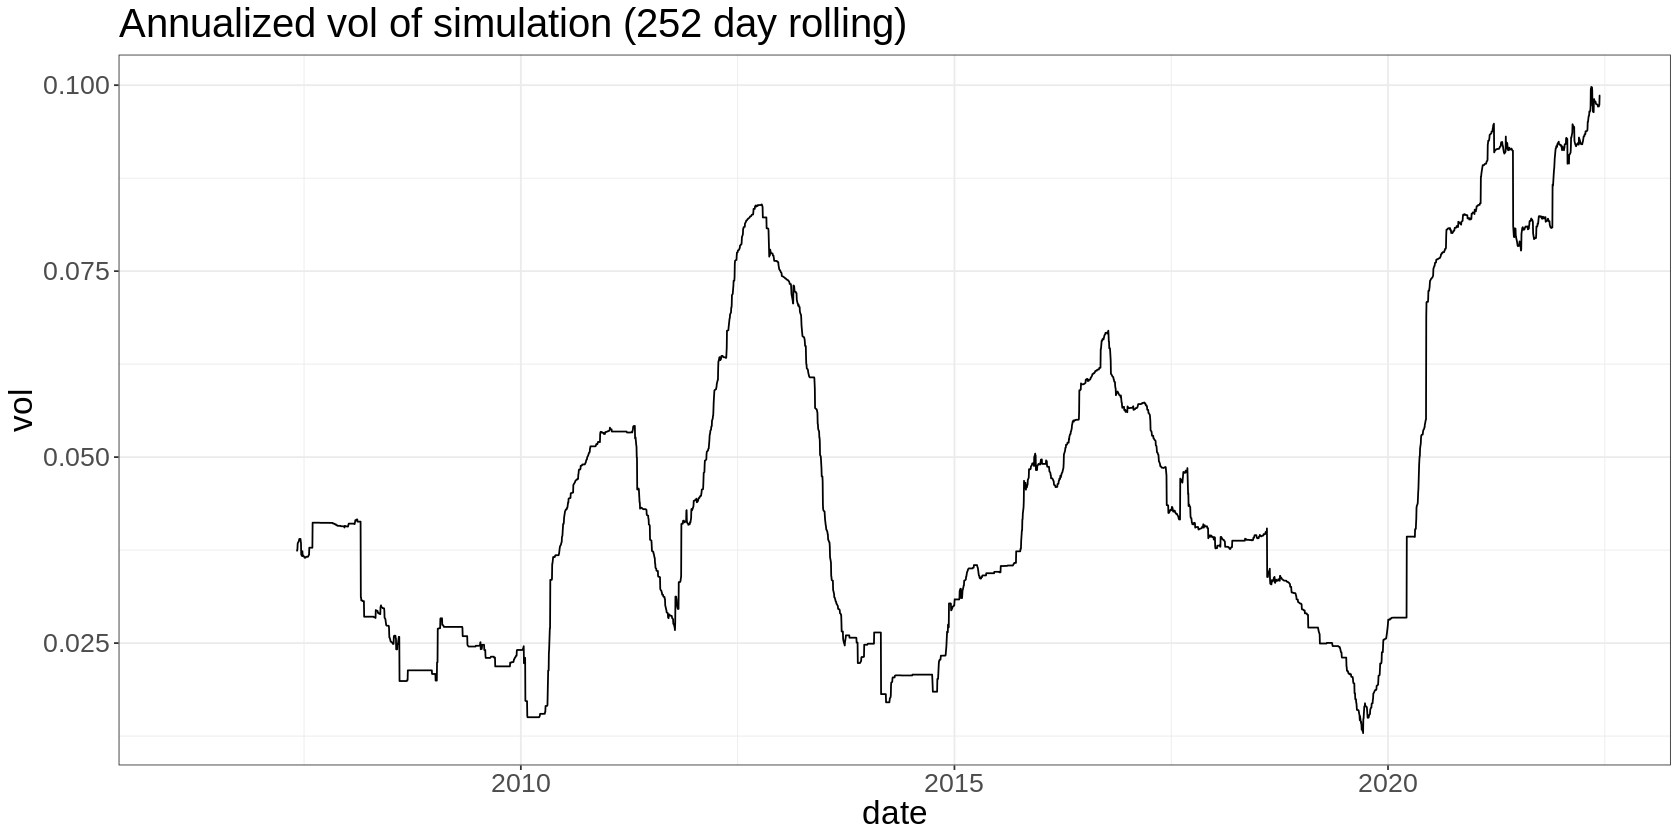

In [ ]:
sv_returns <- features %>%
  mutate(
    position = case_when(vrp_score >= 6 ~ 'Short', vrp_score <= 3 ~ 'Long', TRUE ~ 'Flat'),
    strat1df = case_when(position == 'Short' ~ -SPVIXSTR_1df, position == 'Long' ~ SPVIXSTR_1df, TRUE ~ 0) * 0.125,
    strat2df = case_when(position == 'Short' ~ -SPVIXSTR_1df, position == 'Long' ~ SPVIXSTR_1df, TRUE ~ 0) * 0.125
  ) %>%
  select(date, SPVIXSTR_1df, vrp_score, position, strat1df, strat2df) %>%
  na.omit() %>%
  mutate(
    shortvol_ret = -SPVIXSTR_1df * 0.125,
    shortvol_cumret = cumsum(shortvol_ret)
  )

sv_returns %>%
  ggplot(aes(x=date, y=shortvol_cumret)) + geom_line() +
  ggtitle('Simulation (cost-free) rebalancing to 0.5x VIXY (short vol) or 0.25x  position according to signal')

sv_returns %>%
  mutate(vol = slider::slide_dbl(strat2df, sd, .before=252, .complete=TRUE) * sqrt(252)) %>%
  ggplot(aes(x=date, y=vol)) +
    geom_line() +
    ggtitle('Annualized vol of simulation (252 day rolling)')